In [266]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
from scipy import stats
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/tichaona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tichaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [267]:
# load data
climate = pd.read_excel("Innovative_Pedagogies_for_Climate_Education_among_Adolescents_and_Youths.xlsx")
climate.isnull().sum()

Country                                                                             0
District                                                                            0
Profile                                                                             0
Sex                                                                                 0
Marital                                                                             0
                                                                                 ... 
Other3                                                                             94
In Media, specify other                                                           231
Recommendations_to_increase_climate_knowledge_and_skills.                           4
Recommendation_to_increase_their_role_in_addressing_climate_change.                 2
How_teachers_can_be_supported_to_help_adolescents_and_youths_to_learn_about_CC      1
Length: 155, dtype: int64

In [268]:
climate.head(5)

,Country,District,Profile,Sex,Marital,EducationLevel,Income Sources,guardian,Employed,Entrepreneur,...,If Media.3,Newspapers3,Radio3,Television3,Noticeboards3,Other3,"In Media, specify other",Recommendations_to_increase_climate_knowledge_and_skills.,Recommendation_to_increase_their_role_in_addressing_climate_change.,How_teachers_can_be_supported_to_help_adolescents_and_youths_to_learn_about_CC
0,Zimbabwe,Mutoko,Adolescent (10-18 years),Male,Single,Secondary,From parent/guardian,1,0,0,...,Radio Television,0.0,1.0,1.0,0.0,0.0,NaN,1.internet facilities 2. Computers 3.more text...,1.waste management 2.planting trees recycling ...,1.internet 2.refresher workshops 3.computers
1,Zimbabwe,Mutoko,Adolescent (10-18 years),Male,Single,Secondary,From parent/guardian,1,0,0,...,Television,0.0,0.0,1.0,0.0,0.0,NaN,"Climate change education ,awareness campaigns,...","Formation of clubs, awareness campaigns and in...",Provision of more information on climate chang...
2,Zimbabwe,Mutoko,Adolescent (10-18 years),Female,Single,Secondary,From parent/guardian,1,0,0,...,Radio Television Noticeboards,0.0,1.0,1.0,1.0,0.0,NaN,1.Awareness campaigns 2.Form youth groups to ...,1.Form clubs for awareness 2. Build bins for w...,1. Provision of internet 2.Provision of laptop...
3,Zimbabwe,Mutoko,Adolescent (10-18 years),Male,Single,Secondary,From parent/guardian,1,0,0,...,Newspapers Radio Television,1.0,1.0,1.0,0.0,0.0,NaN,"1.Forming clubs, 2 Ask the school to install ...",1.picking up papers 2.forming environmental cl...,1.provide internet 2. More workshops 3.provide...
4,Zimbabwe,Mutoko,Adolescent (10-18 years),Female,Single,Secondary,From parent/guardian,1,0,0,...,Television,0.0,0.0,1.0,0.0,0.0,NaN,"More educators on climate change required, cli...",Peer and community education. Youth be well ve...,Training teachers on climate change and enviro...


In [269]:
# Check the  Statistical Numerical Data Distribution Summary
climate.describe()

,guardian,Employed,Entrepreneur,Government_Benefits,Retirement_Income,Agriculture,Alimony_or_Child_Support,IncomeSources_Custom,Mobile_phone/Tablet,Internet,...,Media.1,I_don't_know3,Parents,Observing,Books,Newspapers3,Radio3,Television3,Noticeboards3,Other3
count,239.000000,239.000000,239.000000,239.000000,239.0,239.000000,239.000000,239.0,238.000000,238.000000,...,188.000000,188.000000,6.0,2.0,2.0,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.694561,0.230126,0.100418,0.004184,0.0,0.029289,0.004184,1.0,0.831933,0.390756,...,0.558511,0.010638,1.0,1.0,1.0,0.179310,0.793103,0.503448,0.082759,0.062069
std,0.461560,0.421796,0.301188,0.064685,0.0,0.168968,0.064685,0.0,0.374714,0.488948,...,0.497891,0.102866,0.0,0.0,0.0,0.384942,0.406485,0.501721,0.276472,0.242117
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.000000,...,0.000000,0.000000,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.000000,...,1.000000,0.000000,1.0,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.000000,1.000000,...,1.000000,0.000000,1.0,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [270]:
# Check the Categorical Data Distribution

climate.describe(include=['O'])

,Country,District,Profile,Sex,Marital,EducationLevel,Income Sources,Other,Access_to_Technology,Mode_of_Transport,...,How_teachers/educators_are_using_play-based_methods_to_help_adolescents_and_youths_to_learn_about_climate_change?,19. Please provide examples of a challenge that teachers/educators face in trying to help adolescents and youths to learn about climate change?,20. Please provide examples of a resource that teachers/educators need in order to help adolescents and youths to learn about climate change?,"21. Apart from teachers/educators, are there other actors who are helping adolescents and youths in your community to learn about climate change?","If yes, please provide one example of other actors who are helping adolescents and youths to learn about climate change?",If Media.3,"In Media, specify other",Recommendations_to_increase_climate_knowledge_and_skills.,Recommendation_to_increase_their_role_in_addressing_climate_change.,How_teachers_can_be_supported_to_help_adolescents_and_youths_to_learn_about_CC
count,239,239,239,239,239,238,239,238,220,239,...,223,236,238,239,188,145,8,235,237,238
unique,5,11,4,2,5,10,14,5,22,14,...,206,217,224,2,70,16,7,235,235,236
top,Zimbabwe,Mulanje,Adolescent (10-18 years),Female,Single,Secondary,From parent/guardian,0,Mobile phone,Walking,...,Dramas,Resources,Textbooks,Yes,NGOs Media,Radio,Internet,1.internet facilities 2. Computers 3.more text...,I don't know,They should be given more resources
freq,129,32,151,124,182,117,155,229,54,119,...,5,7,6,190,17,57,2,1,3,2


In [271]:
# Descriptive Statistics Summary of al columns:

climate.describe(include='all')

,Country,District,Profile,Sex,Marital,EducationLevel,Income Sources,guardian,Employed,Entrepreneur,...,If Media.3,Newspapers3,Radio3,Television3,Noticeboards3,Other3,"In Media, specify other",Recommendations_to_increase_climate_knowledge_and_skills.,Recommendation_to_increase_their_role_in_addressing_climate_change.,How_teachers_can_be_supported_to_help_adolescents_and_youths_to_learn_about_CC
count,239,239,239,239,239,238,239,239.000000,239.000000,239.000000,...,145,145.000000,145.000000,145.000000,145.000000,145.000000,8,235,237,238
unique,5,11,4,2,5,10,14,NaN,NaN,NaN,...,16,NaN,NaN,NaN,NaN,NaN,7,235,235,236
top,Zimbabwe,Mulanje,Adolescent (10-18 years),Female,Single,Secondary,From parent/guardian,NaN,NaN,NaN,...,Radio,NaN,NaN,NaN,NaN,NaN,Internet,1.internet facilities 2. Computers 3.more text...,I don't know,They should be given more resources
freq,129,32,151,124,182,117,155,NaN,NaN,NaN,...,57,NaN,NaN,NaN,NaN,NaN,2,1,3,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694561,0.230126,0.100418,...,NaN,0.179310,0.793103,0.503448,0.082759,0.062069,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461560,0.421796,0.301188,...,NaN,0.384942,0.406485,0.501721,0.276472,0.242117,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,...,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,...,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [272]:
gender_counts = climate['Sex'].value_counts()
print(gender_counts)

# With percentages
gender_percents = climate['Sex'].value_counts(normalize=True) * 100
print(gender_percents)

Sex
Female    124
Male      115
Name: count, dtype: int64
Sex
Female    51.882845
Male      48.117155
Name: proportion, dtype: float64


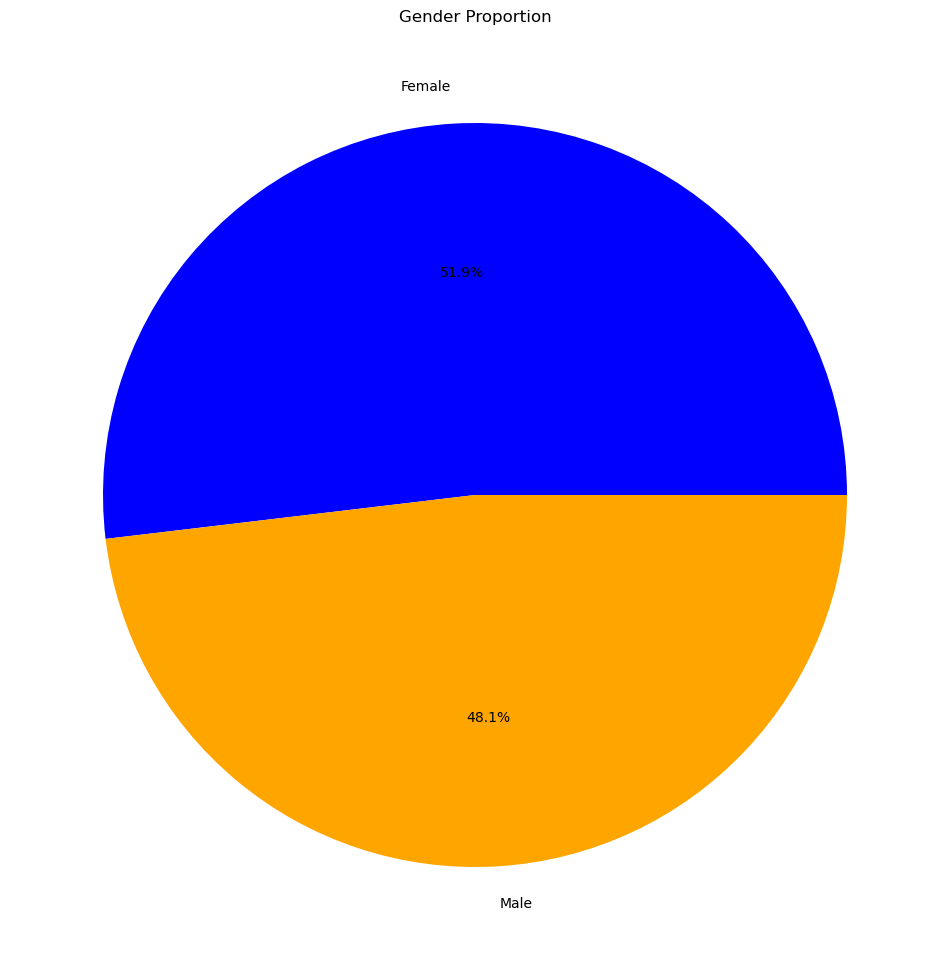

In [273]:
gender_percents.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'],figsize=(12, 20))
plt.title('Gender Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

In [274]:
agegroup_counts = climate['Profile'].value_counts()
print(agegroup_counts)

# With percentages
age_percents = climate['Profile'].value_counts(normalize=True) * 100
print(age_percents)

Profile
Adolescent (10-18 years)    151
Youth (19 -35 years)         36
Teacher/Educator             29
Stakeholder                  23
Name: count, dtype: int64
Profile
Adolescent (10-18 years)    63.179916
Youth (19 -35 years)        15.062762
Teacher/Educator            12.133891
Stakeholder                  9.623431
Name: proportion, dtype: float64


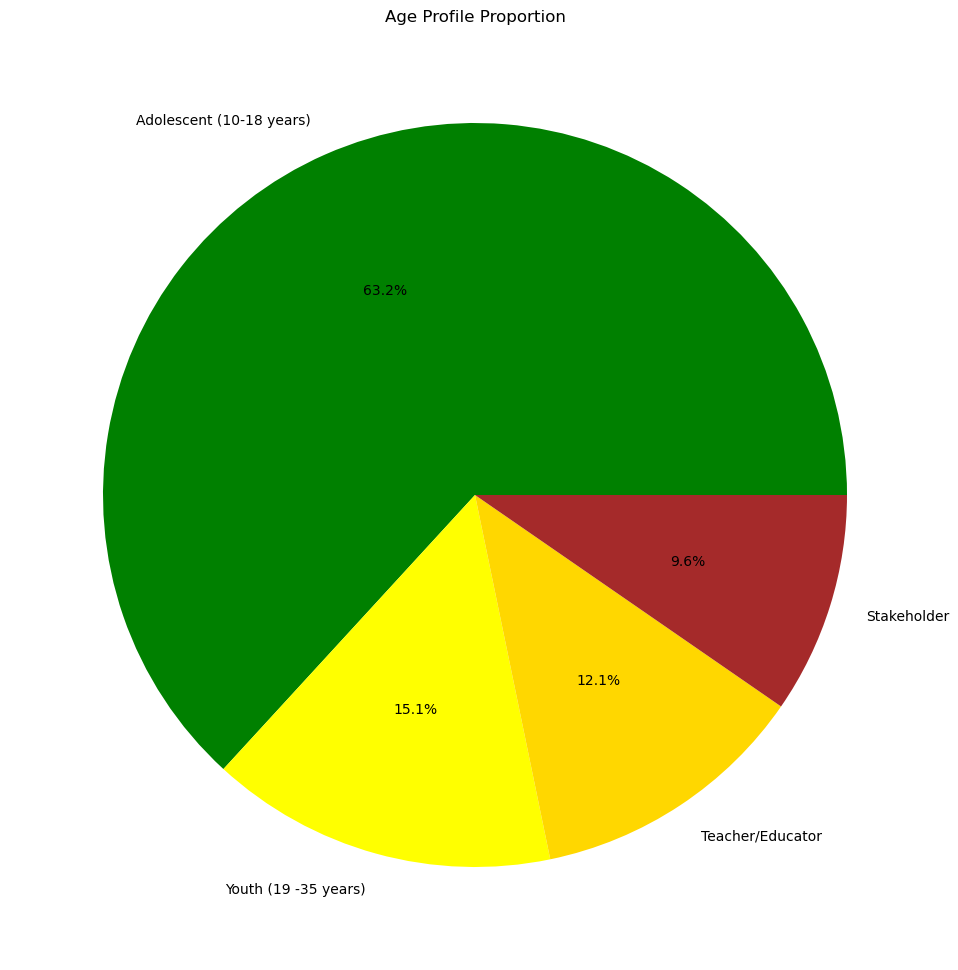

In [275]:
age_percents.plot(kind='pie', autopct='%1.1f%%', colors=['Green','Yellow' ,'Gold','Brown'],figsize=(12, 20))
plt.title('Age Profile Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

In [276]:
Country_counts = climate['Country'].value_counts()
print(Country_counts)

# With percentages
Country_percents = climate['Country'].value_counts(normalize=True) * 100
print(Country_percents)

Country
Zimbabwe        129
Malawi           32
South Africa     28
Rwanda           26
Kenya            24
Name: count, dtype: int64
Country
Zimbabwe        53.974895
Malawi          13.389121
South Africa    11.715481
Rwanda          10.878661
Kenya           10.041841
Name: proportion, dtype: float64


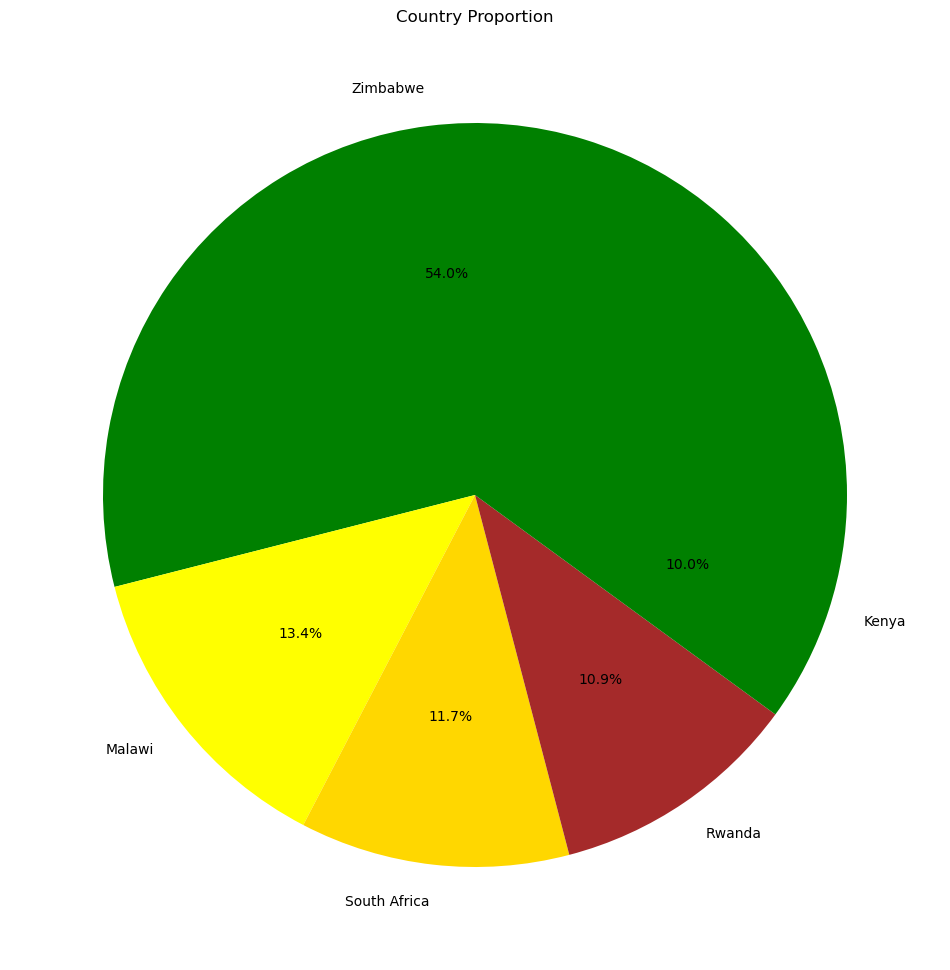

In [277]:
Country_percents.plot(kind='pie', autopct='%1.1f%%', colors=['Green','Yellow' ,'Gold','Brown'],figsize=(12, 20))
plt.title('Country Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

In [278]:
District_counts = climate['District'].value_counts()
print(District_counts)

# With percentages
District_percents = climate['District'].value_counts(normalize=True) * 100
print(District_percents)

District
Mulanje             32
Chiredzi            27
Mutoko              26
Chitungwiza         26
Mutare              26
Rubavu District     26
Buhera              24
Samburu Central     24
Pietermaritzburg    15
uMgungundlovu       12
Western Cape         1
Name: count, dtype: int64
District
Mulanje             13.389121
Chiredzi            11.297071
Mutoko              10.878661
Chitungwiza         10.878661
Mutare              10.878661
Rubavu District     10.878661
Buhera              10.041841
Samburu Central     10.041841
Pietermaritzburg     6.276151
uMgungundlovu        5.020921
Western Cape         0.418410
Name: proportion, dtype: float64


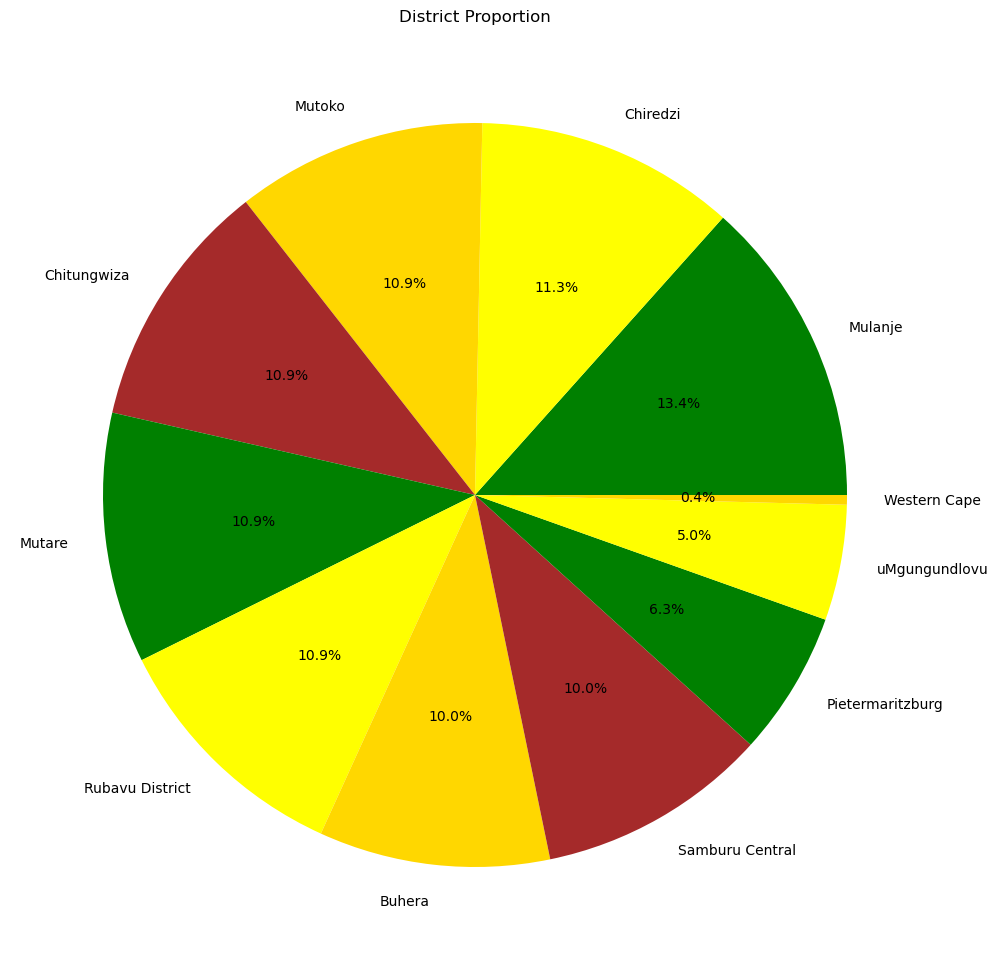

In [279]:
District_percents.plot(kind='pie', autopct='%1.1f%%', colors=['Green','Yellow' ,'Gold','Brown'],figsize=(12, 20))
plt.title('District Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

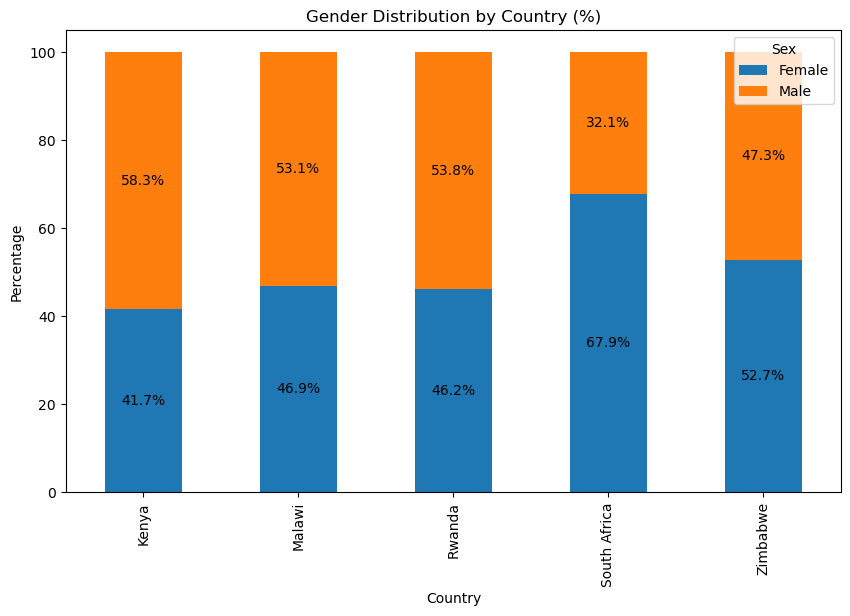

In [280]:
# Create cross-tabulation
cross_tab = pd.crosstab(climate['Country'], climate['Sex'])

# Calculate percentages
cross_tab_perc = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot
ax = cross_tab_perc.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Gender Distribution by Country (%)')
plt.ylabel('Percentage')
plt.xlabel('Country')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.show()

In [281]:
Marital_counts = climate['Marital'].value_counts()
print(Marital_counts)

# With percentages
Marital_percents = climate['Marital'].value_counts(normalize=True) * 100
print(Marital_percents)

Marital
Single       182
Married       51
Divorced       3
Widowed        2
Separated      1
Name: count, dtype: int64
Marital
Single       76.150628
Married      21.338912
Divorced      1.255230
Widowed       0.836820
Separated     0.418410
Name: proportion, dtype: float64


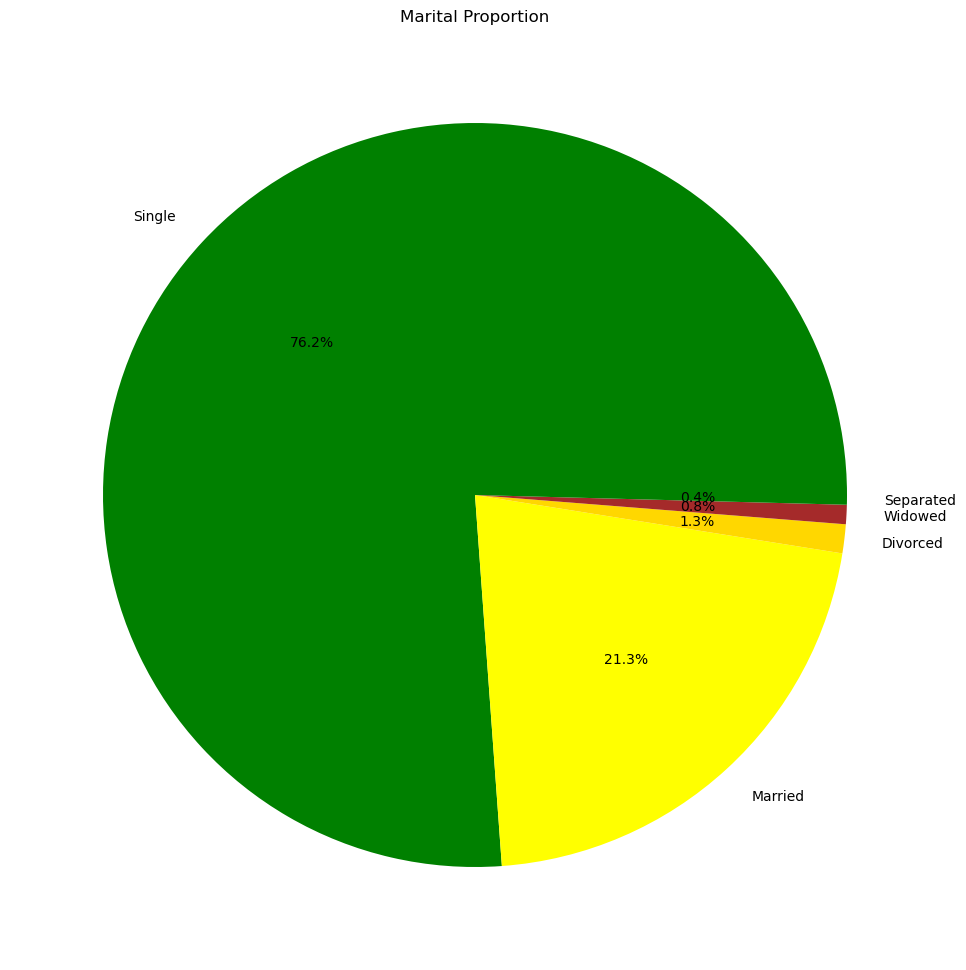

In [282]:
Marital_percents.plot(kind='pie', autopct='%1.1f%%', colors=['Green','Yellow' ,'Gold','Brown'],figsize=(12, 20))
# Create a pie chart with increased size
plt.title('Marital Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

In [283]:
Mode_of_Transport_counts = climate['Mode_of_Transport'].value_counts()
print(Mode_of_Transport_counts)

# With percentages
Mode_of_Transport_percents = climate['Mode_of_Transport'].value_counts(normalize=True) * 100
print(Mode_of_Transport_percents)

Mode_of_Transport
Walking                           119
Public Walking                     36
Public                             35
Private                            21
Cycling                            11
Public Private                      5
Public Walking Other                3
Public Private Walking              2
Cycling Walking                     2
Public Cycling Walking              1
Private Cycling Walking             1
Public Cycling Walking Other        1
Motorcycle                          1
Public Private Cycling Walking      1
Name: count, dtype: int64
Mode_of_Transport
Walking                           49.790795
Public Walking                    15.062762
Public                            14.644351
Private                            8.786611
Cycling                            4.602510
Public Private                     2.092050
Public Walking Other               1.255230
Public Private Walking             0.836820
Cycling Walking                    0.836820
Public Cyc

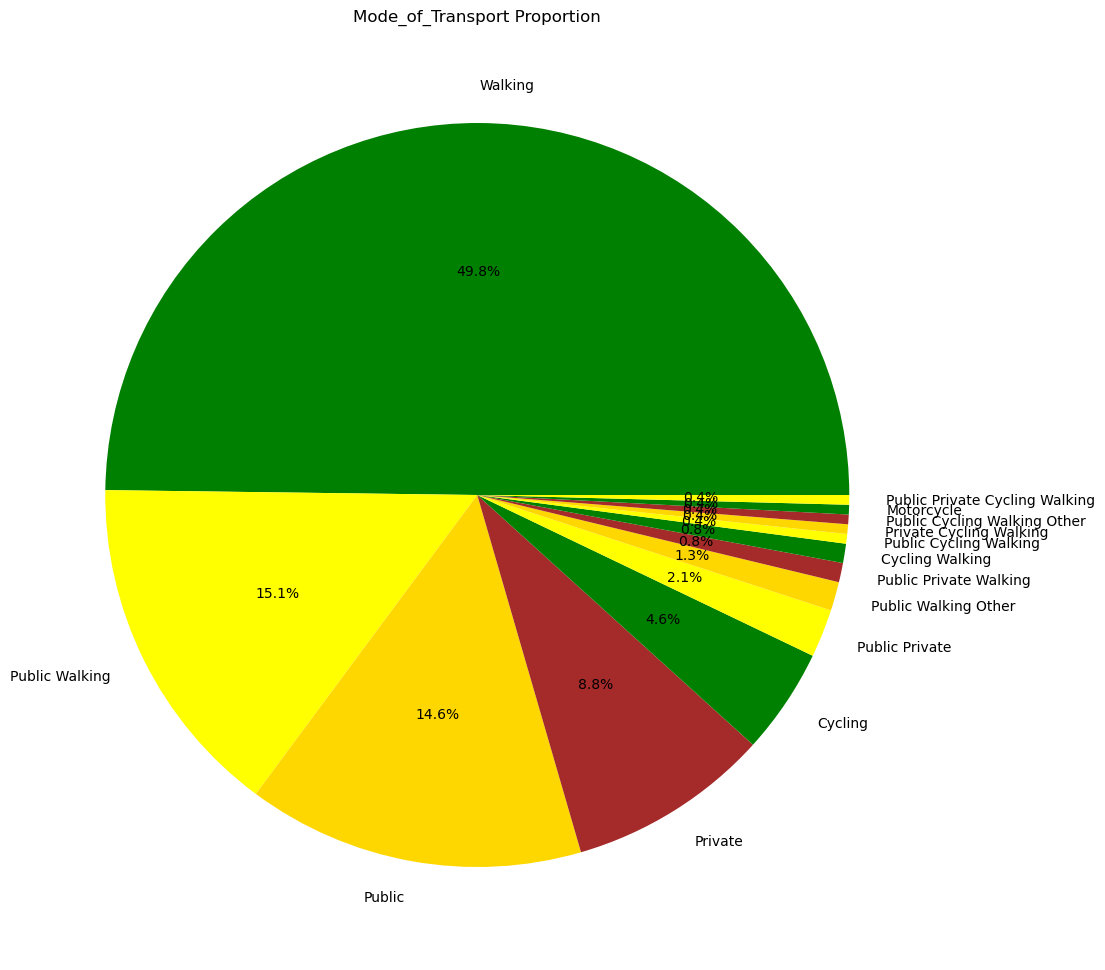

In [284]:
Mode_of_Transport_percents.plot(kind='pie', autopct='%1.1f%%', colors=['Green','Yellow' ,'Gold','Brown'],figsize=(12, 20))
# Create a pie chart with increased size
plt.title('Mode_of_Transport Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

In [285]:
Geographic_location_counts = climate['Geographic_location'].value_counts()
print(Geographic_location_counts)

# With percentages
Geographic_location_percents = climate['Geographic_location'].value_counts(normalize=True) * 100
print(Geographic_location_percents)

Geographic_location
Rural         176
Urban          34
Peri Urban     29
Name: count, dtype: int64
Geographic_location
Rural         73.640167
Urban         14.225941
Peri Urban    12.133891
Name: proportion, dtype: float64


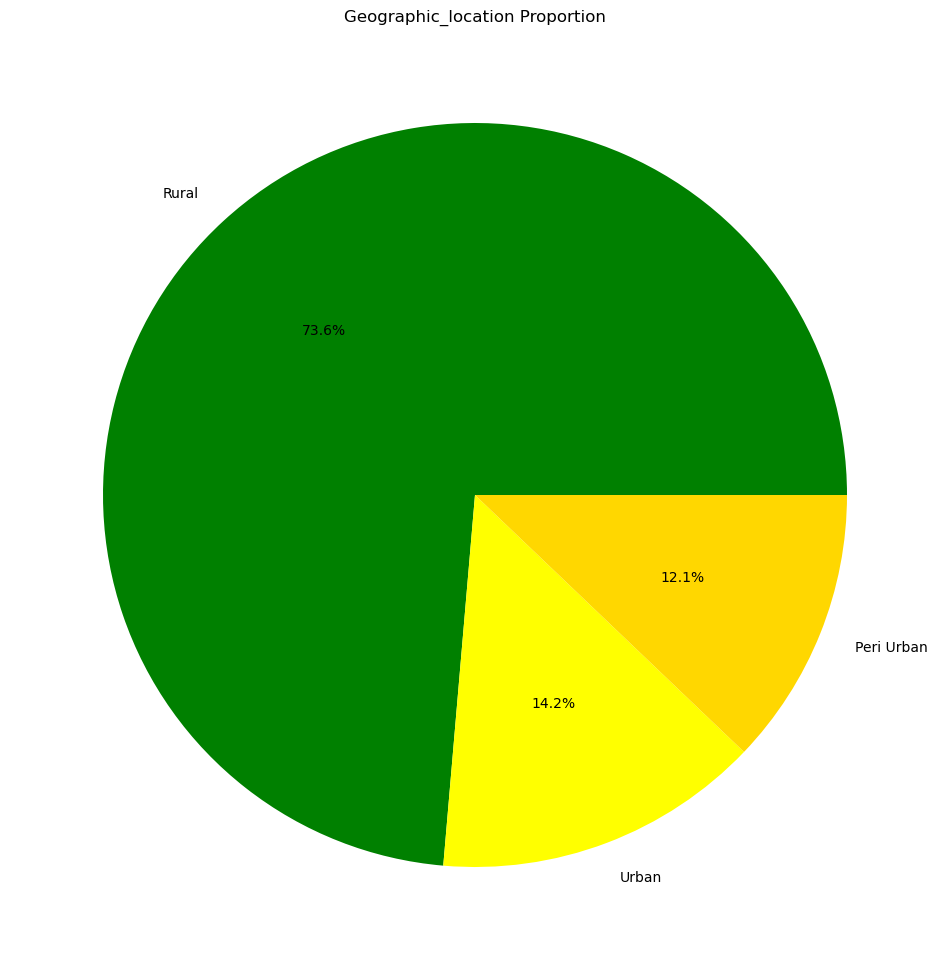

In [286]:
Geographic_location_percents.plot(kind='pie', autopct='%1.1f%%', colors=['Green','Yellow' ,'Gold','Brown'],figsize=(12, 20))
# Create a pie chart with increased size
plt.title('Geographic_location Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

In [287]:
EducationLevel_counts = climate['EducationLevel'].value_counts()
print(EducationLevel_counts)

# With percentages
EducationLevel_percents = climate['EducationLevel'].value_counts(normalize=True) * 100
print(EducationLevel_percents)

EducationLevel
Secondary                          117
Primary                             72
Tertiary/ Vocational Training       42
Post graduate                        1
A1 in Education                      1
A2                                   1
Masters in Education Management      1
Post graduate in education           1
Degree                               1
Curriculum support officer           1
Name: count, dtype: int64
EducationLevel
Secondary                          49.159664
Primary                            30.252101
Tertiary/ Vocational Training      17.647059
Post graduate                       0.420168
A1 in Education                     0.420168
A2                                  0.420168
Masters in Education Management     0.420168
Post graduate in education          0.420168
Degree                              0.420168
Curriculum support officer          0.420168
Name: proportion, dtype: float64


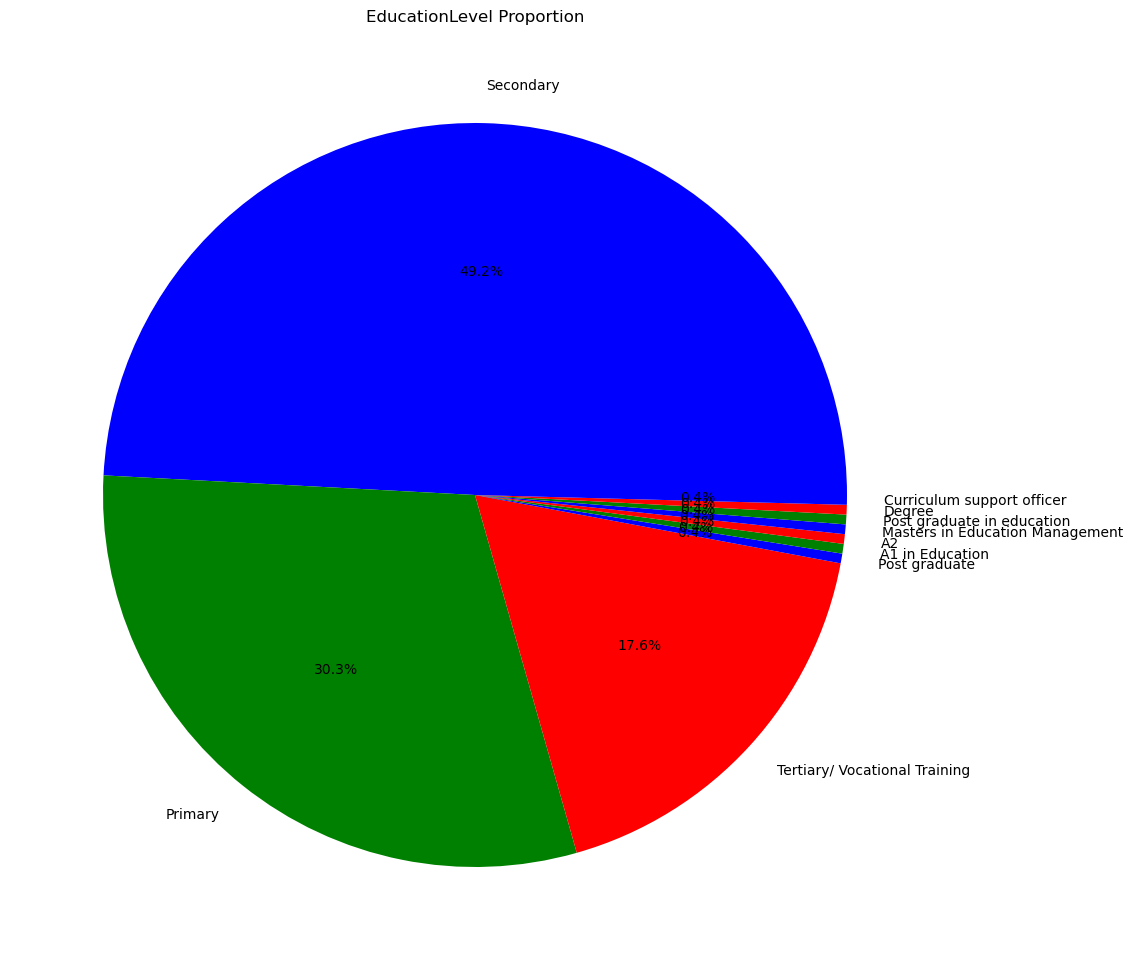

In [288]:
EducationLevel_percents.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green','Red'],figsize=(12, 20))
# Create a pie chart with increased size
plt.title('EducationLevel Proportion')
plt.ylabel('')  # Remove y-label
plt.show()

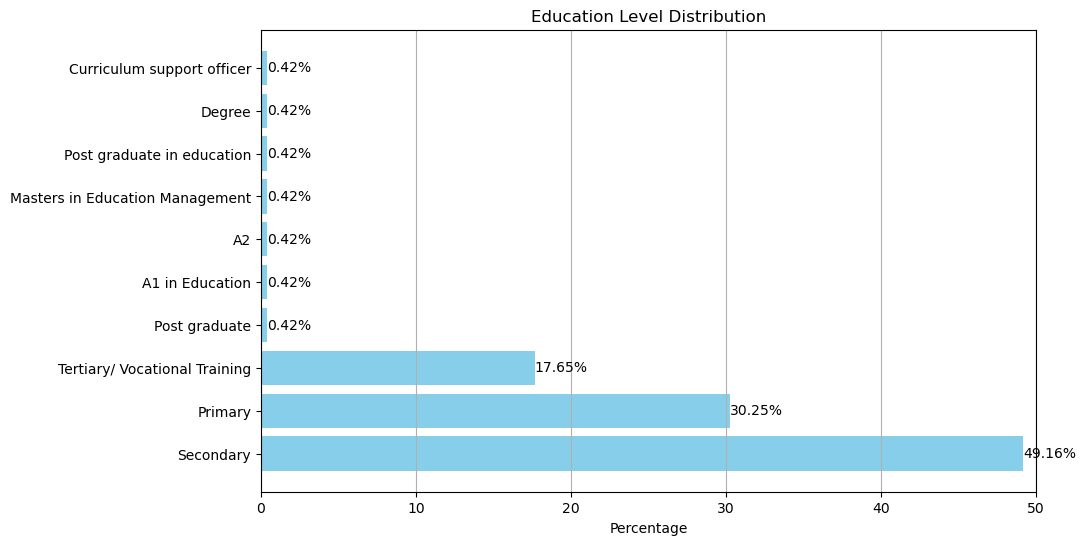

In [289]:
import matplotlib.pyplot as plt

# Data
education_levels = [
    "Secondary", 
    "Primary", 
    "Tertiary/ Vocational Training", 
    "Post graduate", 
    "A1 in Education", 
    "A2", 
    "Masters in Education Management", 
    "Post graduate in education", 
    "Degree", 
    "Curriculum support officer"
]

percentages = [
    49.159664, 
    30.252101, 
    17.647059, 
    0.420168, 
    0.420168, 
    0.420168, 
    0.420168, 
    0.420168, 
    0.420168, 
    0.420168
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(education_levels, percentages, color='skyblue')
plt.xlabel('Percentage')
plt.title('Education Level Distribution')
plt.xlim(0, 50)  # Adjust x-axis limit to fit data
plt.grid(axis='x')

# Adding percentages on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', 
             va='center')

plt.show()

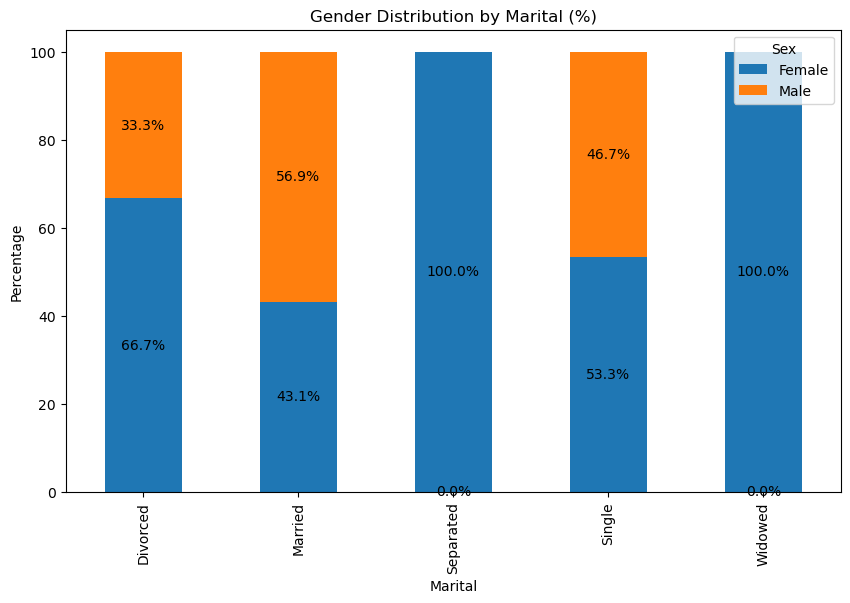

In [290]:
# Create cross-tabulation
cross_tab = pd.crosstab(climate['Marital'], climate['Sex'])

# Calculate percentages
cross_tab_perc = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot
ax = cross_tab_perc.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Gender Distribution by Marital (%)')
plt.ylabel('Percentage')
plt.xlabel('Marital')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.show()

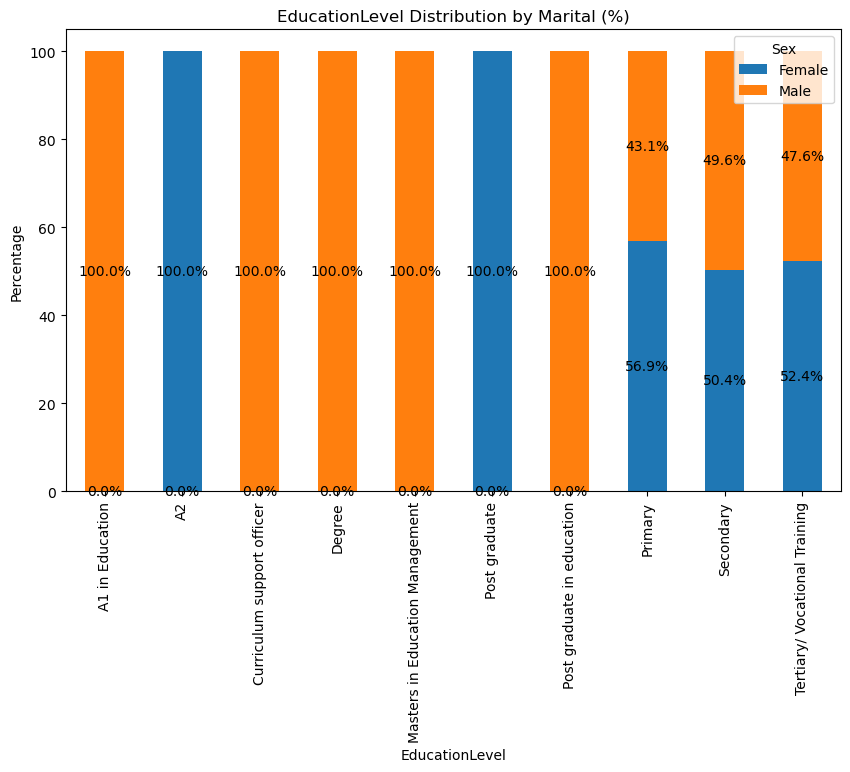

In [291]:
# Create cross-tabulation
cross_tab = pd.crosstab(climate['EducationLevel'], climate['Sex'])

# Calculate percentages
cross_tab_perc = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot
ax = cross_tab_perc.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('EducationLevel Distribution by Marital (%)')
plt.ylabel('Percentage')
plt.xlabel('EducationLevel')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.show()

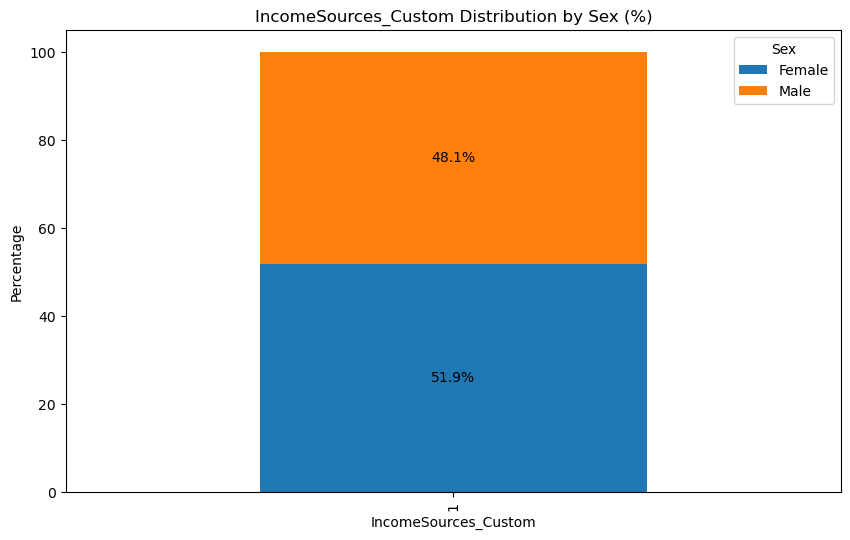

In [292]:
# Create cross-tabulation
cross_tab = pd.crosstab(climate['IncomeSources_Custom'], climate['Sex'])

# Calculate percentages
cross_tab_perc = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot
ax = cross_tab_perc.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('IncomeSources_Custom Distribution by Sex (%)')
plt.ylabel('Percentage')
plt.xlabel('IncomeSources_Custom')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.show()

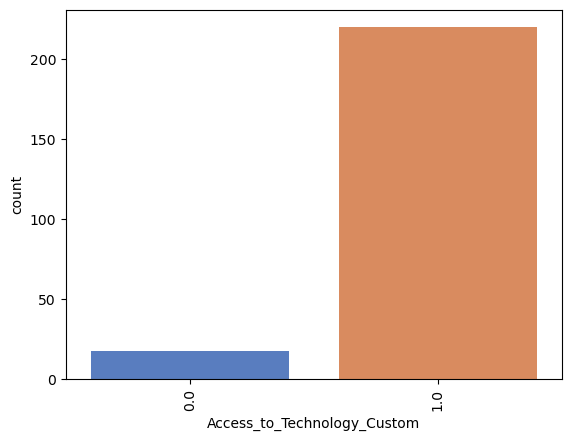

In [293]:
# Let us explore the maths score 

p = sns.countplot(x="Access_to_Technology_Custom", data = climate, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

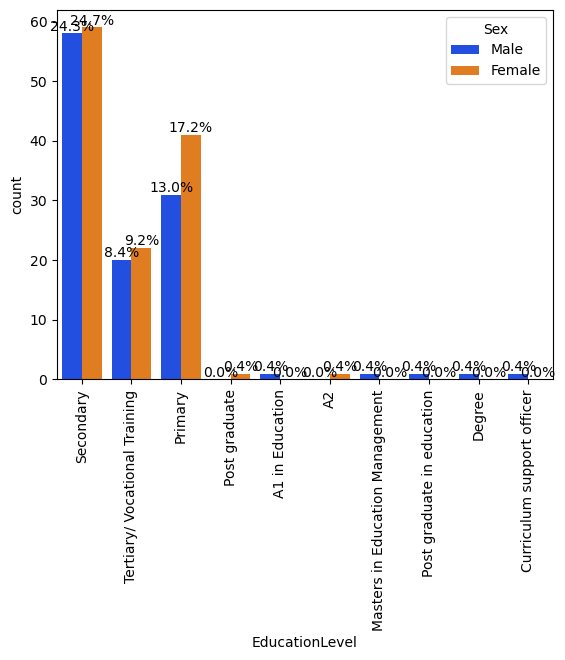

In [294]:
p = sns.countplot(x='EducationLevel', data = climate, hue='Sex', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

for container in p.containers:
    # Calculate the percentage for each bar
    total = len(climate)
    heights = [v.get_height() for v in container]
    percentages = [(h/total)*100 for h in heights]
    
    # Add the percentage labels
    for i, (v, percent) in enumerate(zip(container, percentages)):
        height = v.get_height()
        p.text(v.get_x() + v.get_width()/2., height + 0.01,
                f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

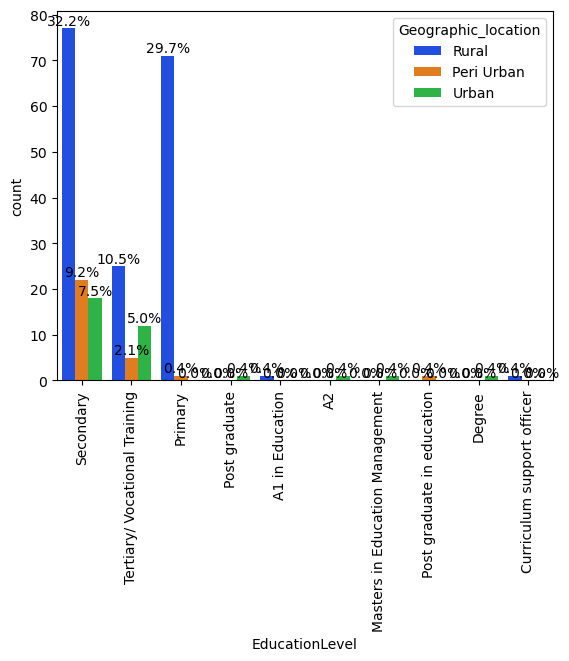

In [295]:
p = sns.countplot(x='EducationLevel', data = climate, hue='Geographic_location', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

for container in p.containers:
    # Calculate the percentage for each bar
    total = len(climate)
    heights = [v.get_height() for v in container]
    percentages = [(h/total)*100 for h in heights]
    
    # Add the percentage labels
    for i, (v, percent) in enumerate(zip(container, percentages)):
        height = v.get_height()
        p.text(v.get_x() + v.get_width()/2., height + 0.05,
                f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

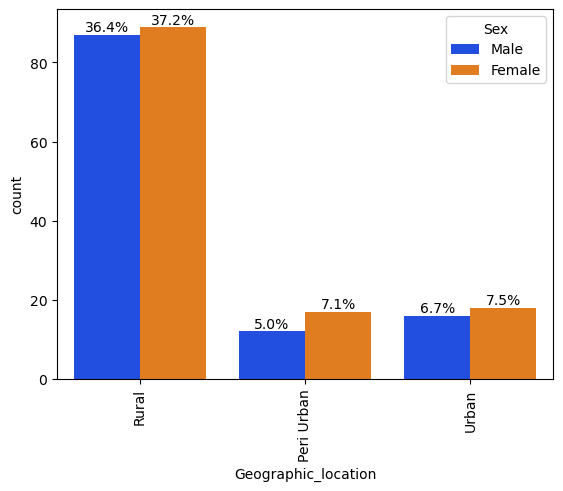

In [296]:
p = sns.countplot(x='Geographic_location', data = climate, hue='Sex', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

for container in p.containers:
    # Calculate the percentage for each bar
    total = len(climate)
    heights = [v.get_height() for v in container]
    percentages = [(h/total)*100 for h in heights]
    
    # Add the percentage labels
    for i, (v, percent) in enumerate(zip(container, percentages)):
        height = v.get_height()
        p.text(v.get_x() + v.get_width()/2., height + 0.01,
                f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

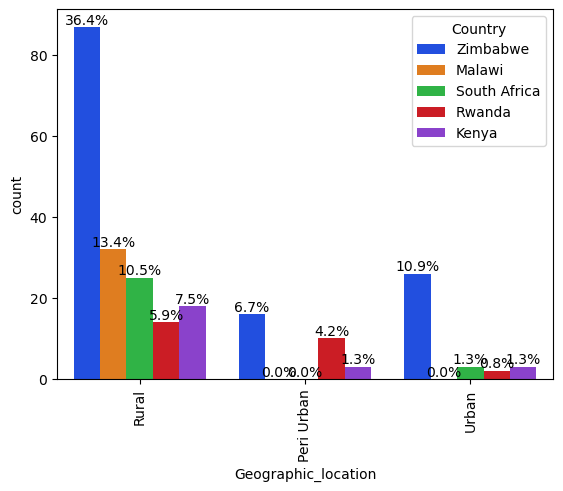

In [297]:
p = sns.countplot(x='Geographic_location', data = climate, hue='Country', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

for container in p.containers:
    # Calculate the percentage for each bar
    total = len(climate)
    heights = [v.get_height() for v in container]
    percentages = [(h/total)*100 for h in heights]
    
    # Add the percentage labels
    for i, (v, percent) in enumerate(zip(container, percentages)):
        height = v.get_height()
        p.text(v.get_x() + v.get_width()/2., height + 0.01,
                f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

In [298]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare text data
docs = climate['Recommendations_to_increase_climate_knowledge_and_skills.'].dropna().astype(str).tolist()

# Create document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(docs)

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

Topic #0:
['peer', 'teaching', 'internet', 'access', 'learning', 'need', 'meetings', 'youths', 'information', 'community']


Topic #1:
['skills', 'join', 'teachers', 'campaigns', 'community', 'research', 'clubs', 'awareness', 'change', 'climate']


Topic #2:
['media', 'books', 'youth', 'clubs', 'school', 'radios', 'information', 'listening', 'change', 'climate']


Topic #3:
['use', 'adolescents', 'researching', 'youths', 'workshops', 'posters', 'provision', 'internet', 'awareness', 'campaigns']


Topic #4:
['attending', 'participate', 'use', 'awareness', 'trees', 'lessons', 'youths', 'internet', 'activities', 'phones']




[nltk_data] Downloading package punkt to /Users/tichaona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tichaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


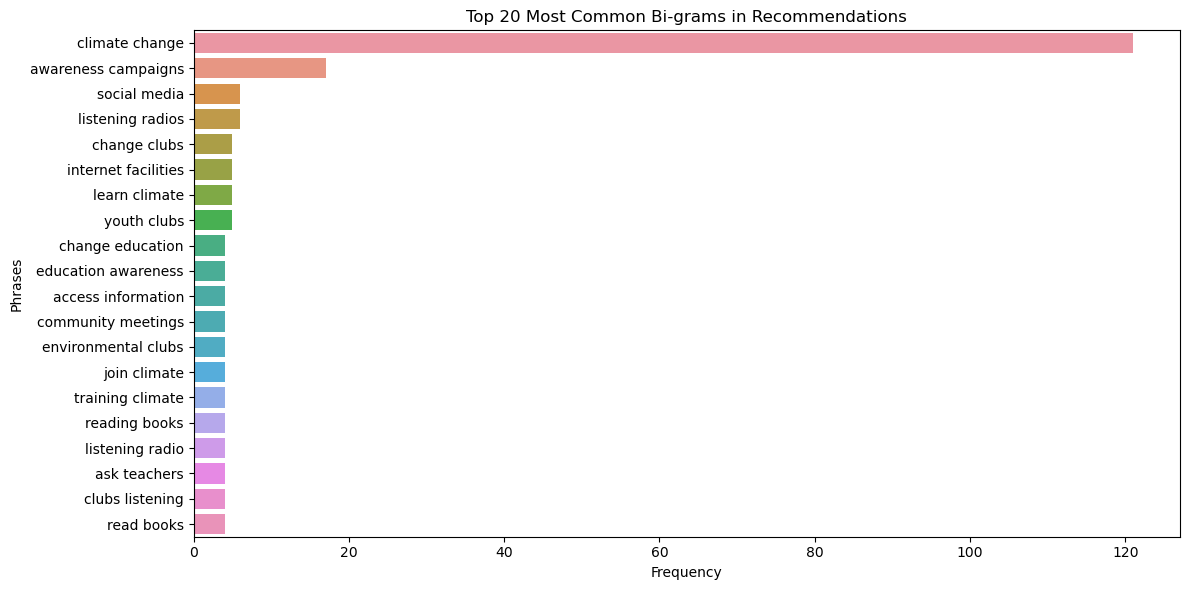

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


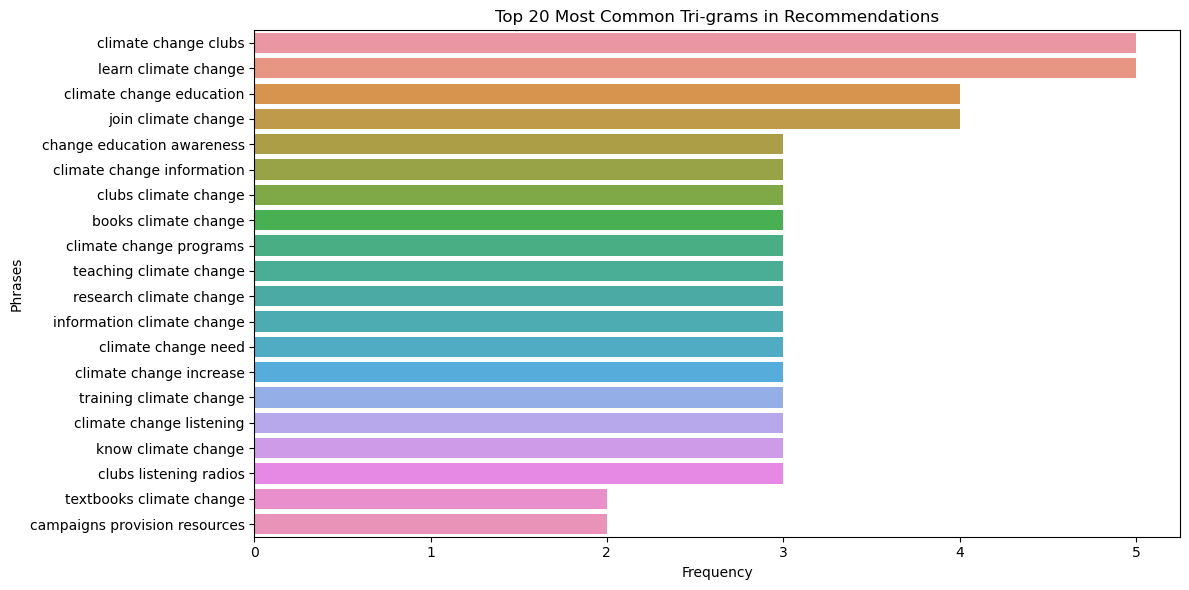


Top Bi-grams:
climate change: 121 occurrences
awareness campaigns: 17 occurrences
social media: 6 occurrences
listening radios: 6 occurrences
change clubs: 5 occurrences
internet facilities: 5 occurrences
learn climate: 5 occurrences
youth clubs: 5 occurrences
change education: 4 occurrences
education awareness: 4 occurrences
access information: 4 occurrences
community meetings: 4 occurrences
environmental clubs: 4 occurrences
join climate: 4 occurrences
training climate: 4 occurrences
reading books: 4 occurrences
listening radio: 4 occurrences
ask teachers: 4 occurrences
clubs listening: 4 occurrences
read books: 4 occurrences

Top Tri-grams:
climate change clubs: 5 occurrences
learn climate change: 5 occurrences
climate change education: 4 occurrences
join climate change: 4 occurrences
change education awareness: 3 occurrences
climate change information: 3 occurrences
clubs climate change: 3 occurrences
books climate change: 3 occurrences
climate change programs: 3 occurrences
teach

In [299]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['Recommendations_to_increase_climate_knowledge_and_skills.'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top bi-grams and tri-grams
bigrams = get_top_ngrams(filtered_tokens, 2)
trigrams = get_top_ngrams(filtered_tokens, 3)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_bigrams = format_ngrams(bigrams)
formatted_trigrams = format_ngrams(trigrams)

# Plot bi-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=[count for phrase, count in formatted_bigrams],
            y=[phrase for phrase, count in formatted_bigrams])
plt.title('Top 20 Most Common Bi-grams in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.tight_layout()
plt.show()

# Plot tri-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=[count for phrase, count in formatted_trigrams],
            y=[phrase for phrase, count in formatted_trigrams])
plt.title('Top 20 Most Common Tri-grams in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.tight_layout()
plt.show()

# Print the results in console as well
print("\nTop Bi-grams:")
for phrase, count in formatted_bigrams:
    print(f"{phrase}: {count} occurrences")

print("\nTop Tri-grams:")
for phrase, count in formatted_trigrams:
    print(f"{phrase}: {count} occurrences")

[nltk_data] Downloading package punkt to /Users/tichaona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tichaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


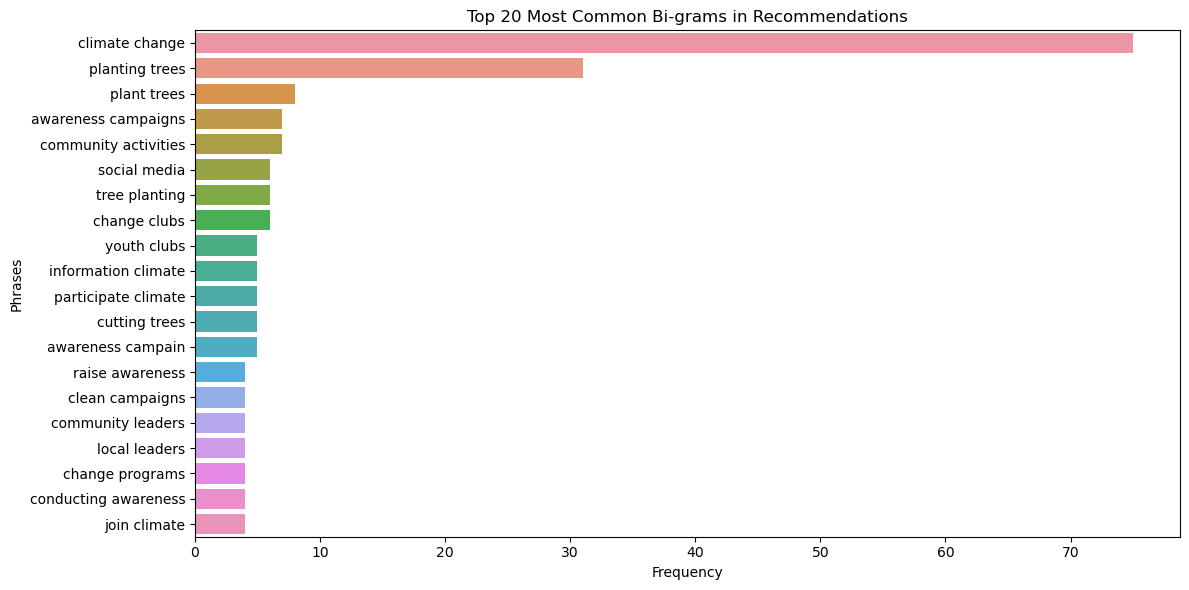

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


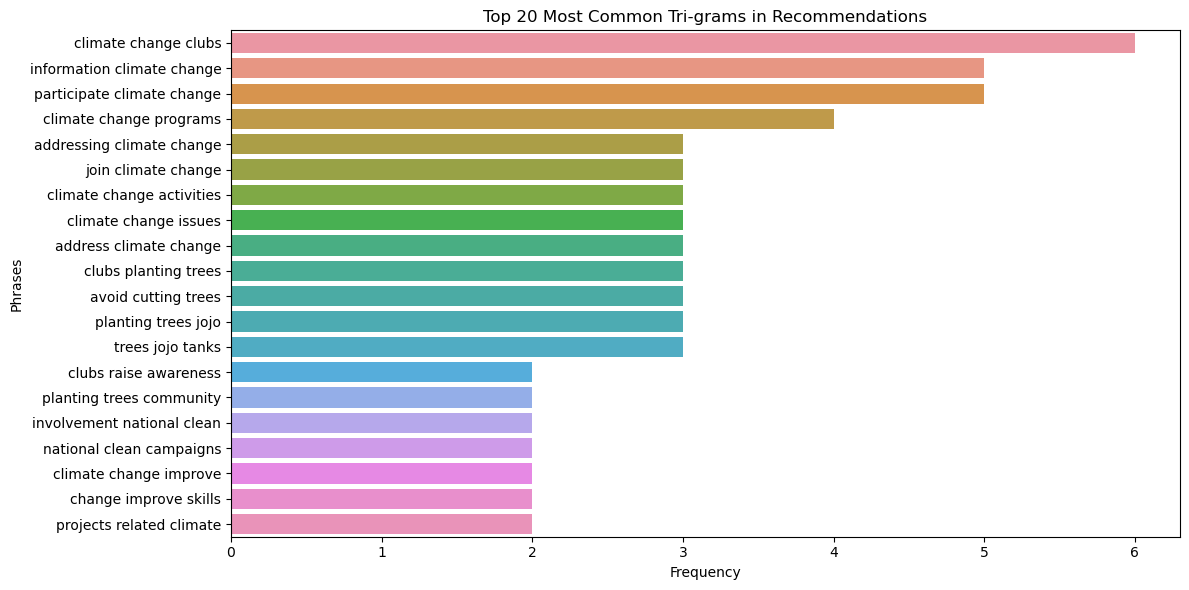


Top Bi-grams:
climate change: 75 occurrences
planting trees: 31 occurrences
plant trees: 8 occurrences
awareness campaigns: 7 occurrences
community activities: 7 occurrences
social media: 6 occurrences
tree planting: 6 occurrences
change clubs: 6 occurrences
youth clubs: 5 occurrences
information climate: 5 occurrences
participate climate: 5 occurrences
cutting trees: 5 occurrences
awareness campain: 5 occurrences
raise awareness: 4 occurrences
clean campaigns: 4 occurrences
community leaders: 4 occurrences
local leaders: 4 occurrences
change programs: 4 occurrences
conducting awareness: 4 occurrences
join climate: 4 occurrences

Top Tri-grams:
climate change clubs: 6 occurrences
information climate change: 5 occurrences
participate climate change: 5 occurrences
climate change programs: 4 occurrences
addressing climate change: 3 occurrences
join climate change: 3 occurrences
climate change activities: 3 occurrences
climate change issues: 3 occurrences
address climate change: 3 occurre

In [300]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['Recommendation_to_increase_their_role_in_addressing_climate_change.'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top bi-grams and tri-grams
bigrams = get_top_ngrams(filtered_tokens, 2)
trigrams = get_top_ngrams(filtered_tokens, 3)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_bigrams = format_ngrams(bigrams)
formatted_trigrams = format_ngrams(trigrams)

# Plot bi-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=[count for phrase, count in formatted_bigrams],
            y=[phrase for phrase, count in formatted_bigrams])
plt.title('Top 20 Most Common Bi-grams in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.tight_layout()
plt.show()

# Plot tri-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=[count for phrase, count in formatted_trigrams],
            y=[phrase for phrase, count in formatted_trigrams])
plt.title('Top 20 Most Common Tri-grams in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.tight_layout()
plt.show()

# Print the results in console as well
print("\nTop Bi-grams:")
for phrase, count in formatted_bigrams:
    print(f"{phrase}: {count} occurrences")

print("\nTop Tri-grams:")
for phrase, count in formatted_trigrams:
    print(f"{phrase}: {count} occurrences")

[nltk_data] Downloading package punkt to /Users/tichaona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tichaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


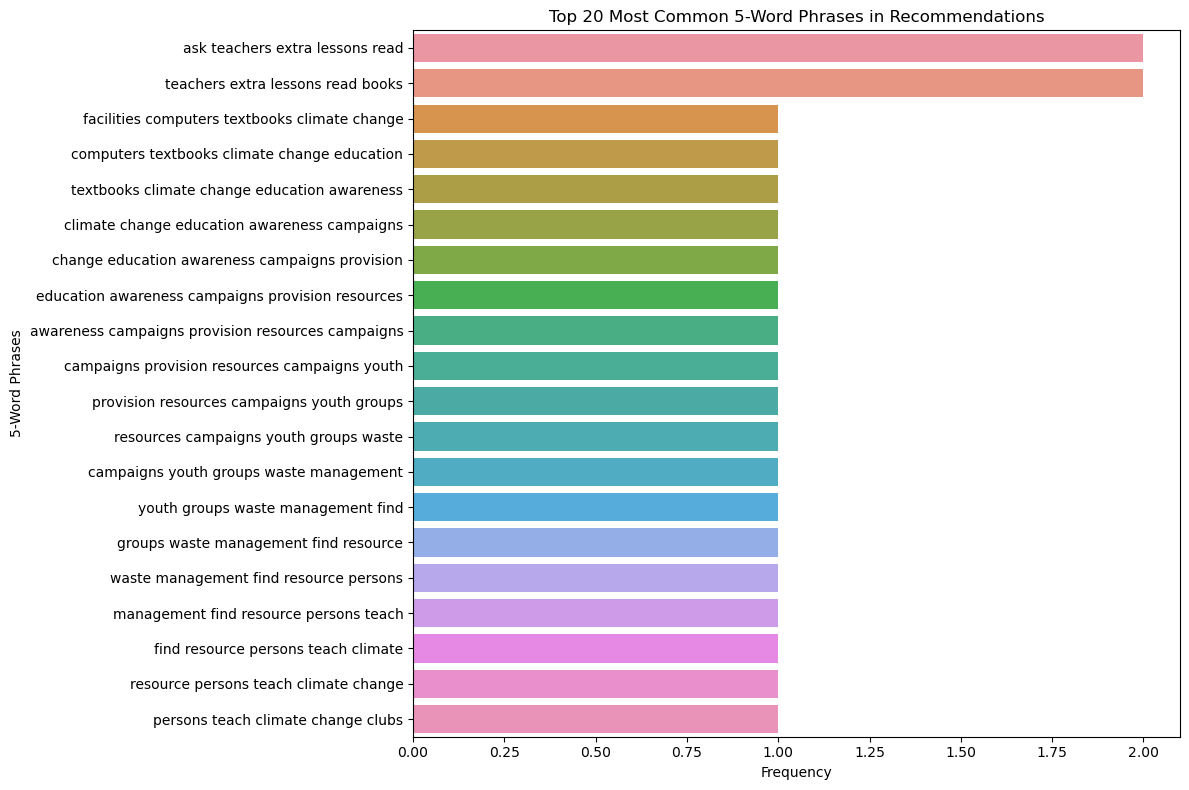


Top 5-Word Recommendation Phrases:
1. Ask teachers extra lessons read. (Occurrences: 2)
2. Teachers extra lessons read books. (Occurrences: 2)
3. Facilities computers textbooks climate change. (Occurrences: 1)
4. Computers textbooks climate change education. (Occurrences: 1)
5. Textbooks climate change education awareness. (Occurrences: 1)
6. Climate change education awareness campaigns. (Occurrences: 1)
7. Change education awareness campaigns provision. (Occurrences: 1)
8. Education awareness campaigns provision resources. (Occurrences: 1)
9. Awareness campaigns provision resources campaigns. (Occurrences: 1)
10. Campaigns provision resources campaigns youth. (Occurrences: 1)
11. Provision resources campaigns youth groups. (Occurrences: 1)
12. Resources campaigns youth groups waste. (Occurrences: 1)
13. Campaigns youth groups waste management. (Occurrences: 1)
14. Youth groups waste management find. (Occurrences: 1)
15. Groups waste management find resource. (Occurrences: 1)
16. Wast

In [301]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['Recommendations_to_increase_climate_knowledge_and_skills.'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

[nltk_data] Downloading package punkt to /Users/tichaona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tichaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


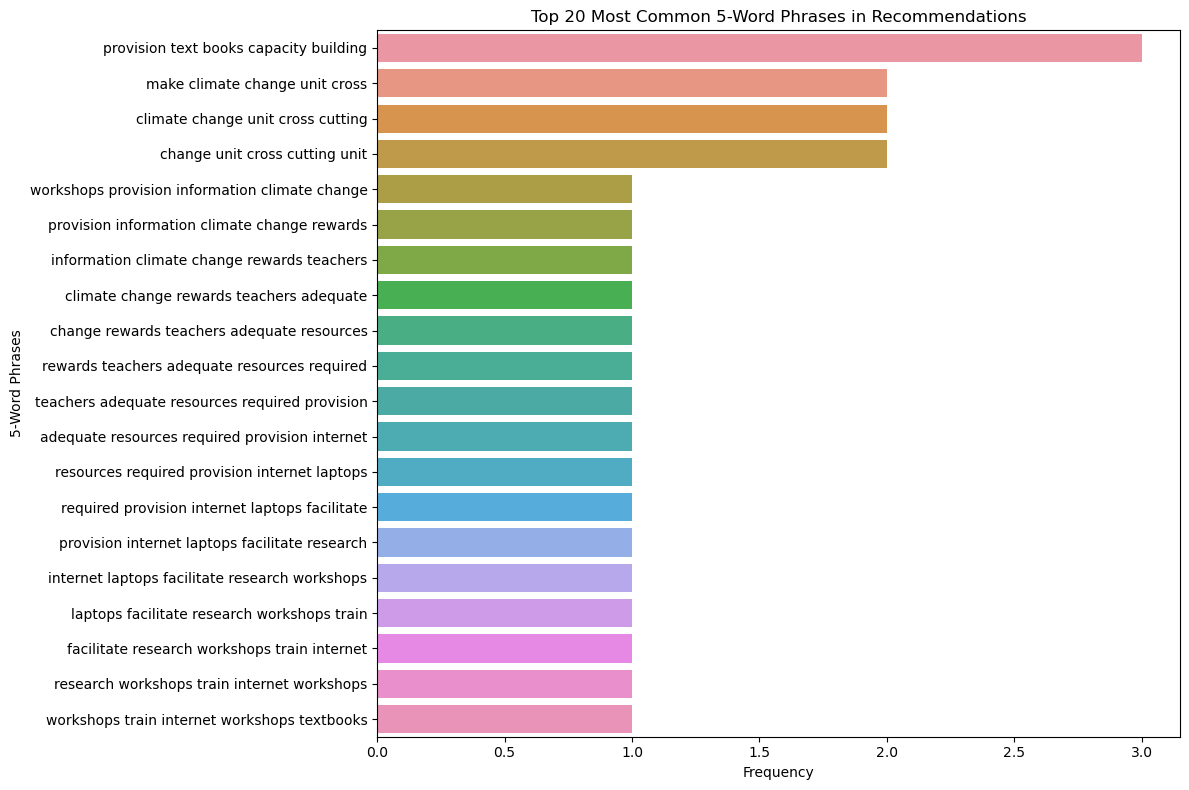


Top 5-Word Recommendation Phrases:
1. Provision text books capacity building. (Occurrences: 3)
2. Make climate change unit cross. (Occurrences: 2)
3. Climate change unit cross cutting. (Occurrences: 2)
4. Change unit cross cutting unit. (Occurrences: 2)
5. Workshops provision information climate change. (Occurrences: 1)
6. Provision information climate change rewards. (Occurrences: 1)
7. Information climate change rewards teachers. (Occurrences: 1)
8. Climate change rewards teachers adequate. (Occurrences: 1)
9. Change rewards teachers adequate resources. (Occurrences: 1)
10. Rewards teachers adequate resources required. (Occurrences: 1)
11. Teachers adequate resources required provision. (Occurrences: 1)
12. Adequate resources required provision internet. (Occurrences: 1)
13. Resources required provision internet laptops. (Occurrences: 1)
14. Required provision internet laptops facilitate. (Occurrences: 1)
15. Provision internet laptops facilitate research. (Occurrences: 1)
16. Inter

In [302]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['How_teachers_can_be_supported_to_help_adolescents_and_youths_to_learn_about_CC'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

[nltk_data] Downloading package punkt to /Users/tichaona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tichaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


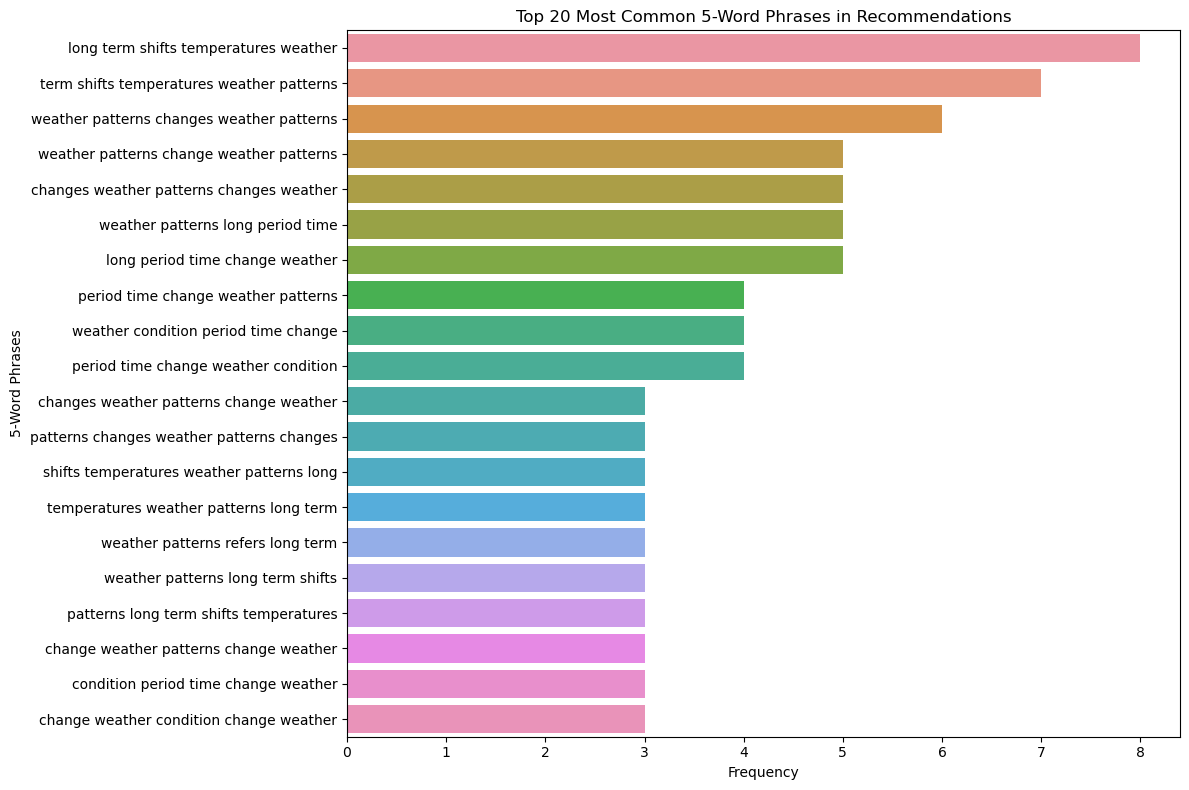


Top 5-Word Recommendation Phrases:
1. Long term shifts temperatures weather. (Occurrences: 8)
2. Term shifts temperatures weather patterns. (Occurrences: 7)
3. Weather patterns changes weather patterns. (Occurrences: 6)
4. Weather patterns change weather patterns. (Occurrences: 5)
5. Changes weather patterns changes weather. (Occurrences: 5)
6. Weather patterns long period time. (Occurrences: 5)
7. Long period time change weather. (Occurrences: 5)
8. Period time change weather patterns. (Occurrences: 4)
9. Weather condition period time change. (Occurrences: 4)
10. Period time change weather condition. (Occurrences: 4)
11. Changes weather patterns change weather. (Occurrences: 3)
12. Patterns changes weather patterns changes. (Occurrences: 3)
13. Shifts temperatures weather patterns long. (Occurrences: 3)
14. Temperatures weather patterns long term. (Occurrences: 3)
15. Weather patterns refers long term. (Occurrences: 3)
16. Weather patterns long term shifts. (Occurrences: 3)
17. Patte

In [303]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['Meaning_of_climate change'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

[nltk_data] Downloading package punkt to /Users/tichaona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tichaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


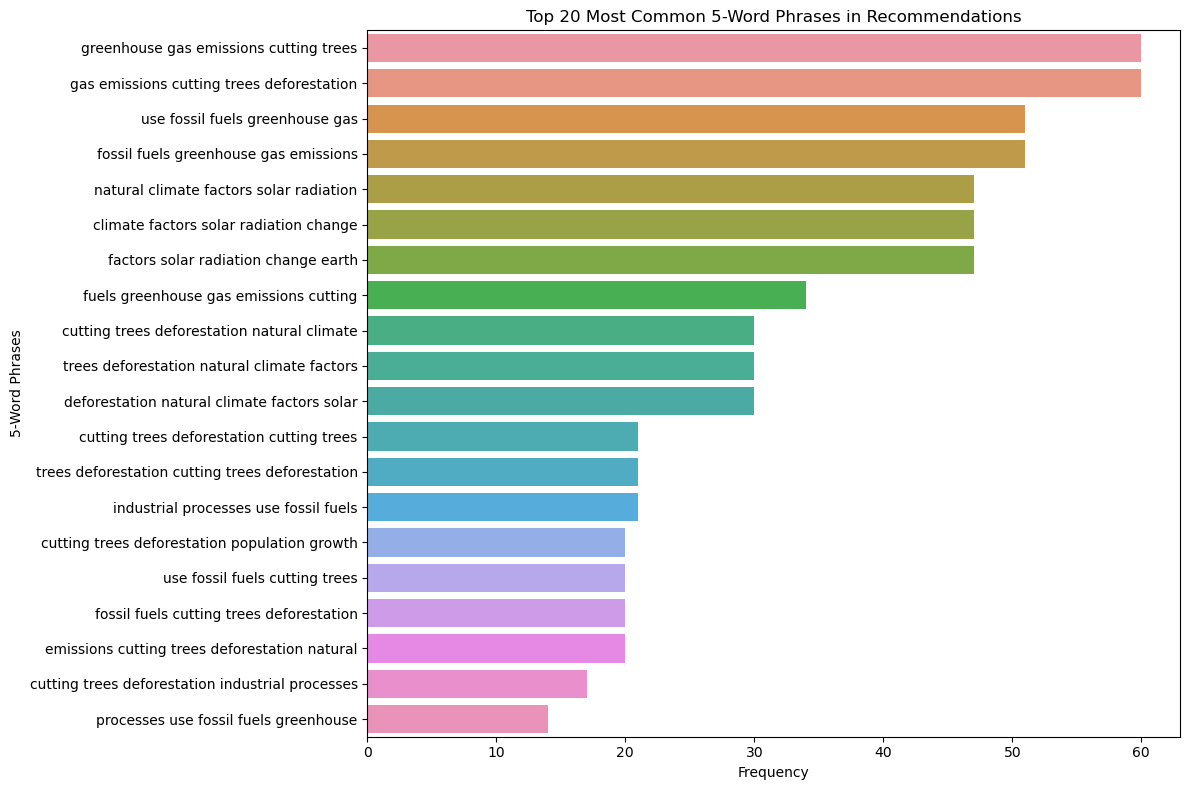


Top 5-Word Recommendation Phrases:
1. Greenhouse gas emissions cutting trees. (Occurrences: 60)
2. Gas emissions cutting trees deforestation. (Occurrences: 60)
3. Use fossil fuels greenhouse gas. (Occurrences: 51)
4. Fossil fuels greenhouse gas emissions. (Occurrences: 51)
5. Natural climate factors solar radiation. (Occurrences: 47)
6. Climate factors solar radiation change. (Occurrences: 47)
7. Factors solar radiation change earth. (Occurrences: 47)
8. Fuels greenhouse gas emissions cutting. (Occurrences: 34)
9. Cutting trees deforestation natural climate. (Occurrences: 30)
10. Trees deforestation natural climate factors. (Occurrences: 30)
11. Deforestation natural climate factors solar. (Occurrences: 30)
12. Cutting trees deforestation cutting trees. (Occurrences: 21)
13. Trees deforestation cutting trees deforestation. (Occurrences: 21)
14. Industrial processes use fossil fuels. (Occurrences: 21)
15. Cutting trees deforestation population growth. (Occurrences: 20)
16. Use fossil f

In [304]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['Biggest_cause_of_climate_change?'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in Recommendations')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

In [305]:
from scipy.stats import chi2_contingency

# Create contingency table
location_awareness = pd.crosstab(climate['Geographic_location'], 
                                climate['Meaning_of_climate change'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(location_awareness)

print(f"Chi-Square Test for Geographic Location vs Awareness:")
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")
print("\nContingency Table:")
print(location_awareness)

Chi-Square Test for Geographic Location vs Awareness:
Chi2 Statistic: 448.257
P-value: 0.2622

Contingency Table:
Meaning_of_climate change  A Change in the environment  \
Geographic_location                                      
Peri Urban                                           0   
Rural                                                1   
Urban                                                0   

Meaning_of_climate change  A atmospheric condition that changes over a long period of time  \
Geographic_location                                                                          
Peri Urban                                                                 0                 
Rural                                                                      0                 
Urban                                                                      1                 

Meaning_of_climate change  A long term change of temperature and weather  \
Geographic_location                             

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


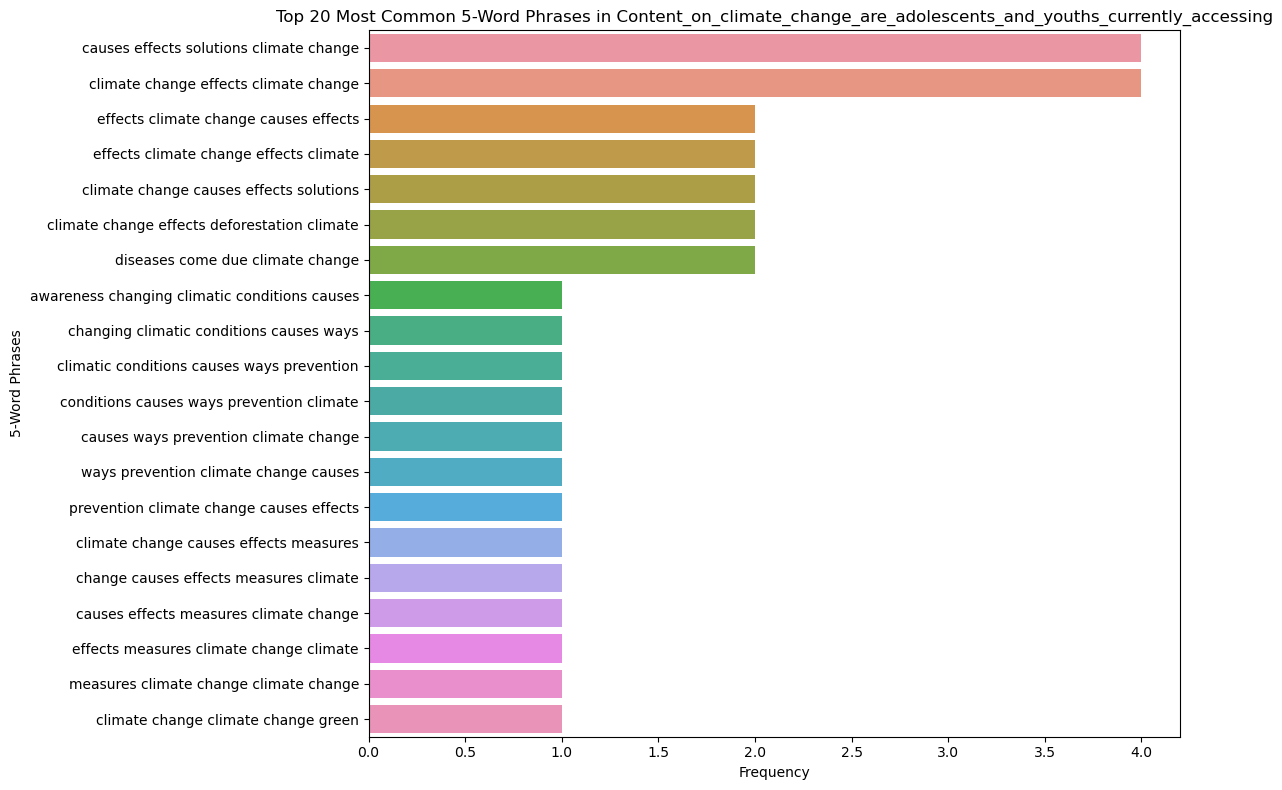


Top 5-Word Recommendation Phrases:
1. Causes effects solutions climate change. (Occurrences: 4)
2. Climate change effects climate change. (Occurrences: 4)
3. Effects climate change causes effects. (Occurrences: 2)
4. Effects climate change effects climate. (Occurrences: 2)
5. Climate change causes effects solutions. (Occurrences: 2)
6. Climate change effects deforestation climate. (Occurrences: 2)
7. Diseases come due climate change. (Occurrences: 2)
8. Awareness changing climatic conditions causes. (Occurrences: 1)
9. Changing climatic conditions causes ways. (Occurrences: 1)
10. Climatic conditions causes ways prevention. (Occurrences: 1)
11. Conditions causes ways prevention climate. (Occurrences: 1)
12. Causes ways prevention climate change. (Occurrences: 1)
13. Ways prevention climate change causes. (Occurrences: 1)
14. Prevention climate change causes effects. (Occurrences: 1)
15. Climate change causes effects measures. (Occurrences: 1)
16. Change causes effects measures climate

In [306]:
# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['Content_on_climate_change_are_adolescents_and_youths_currently_accessing'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in Content_on_climate_change_are_adolescents_and_youths_currently_accessing')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

10. Content_on_climate_change_are_adolescents_and_youths_interested_in_accessing

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


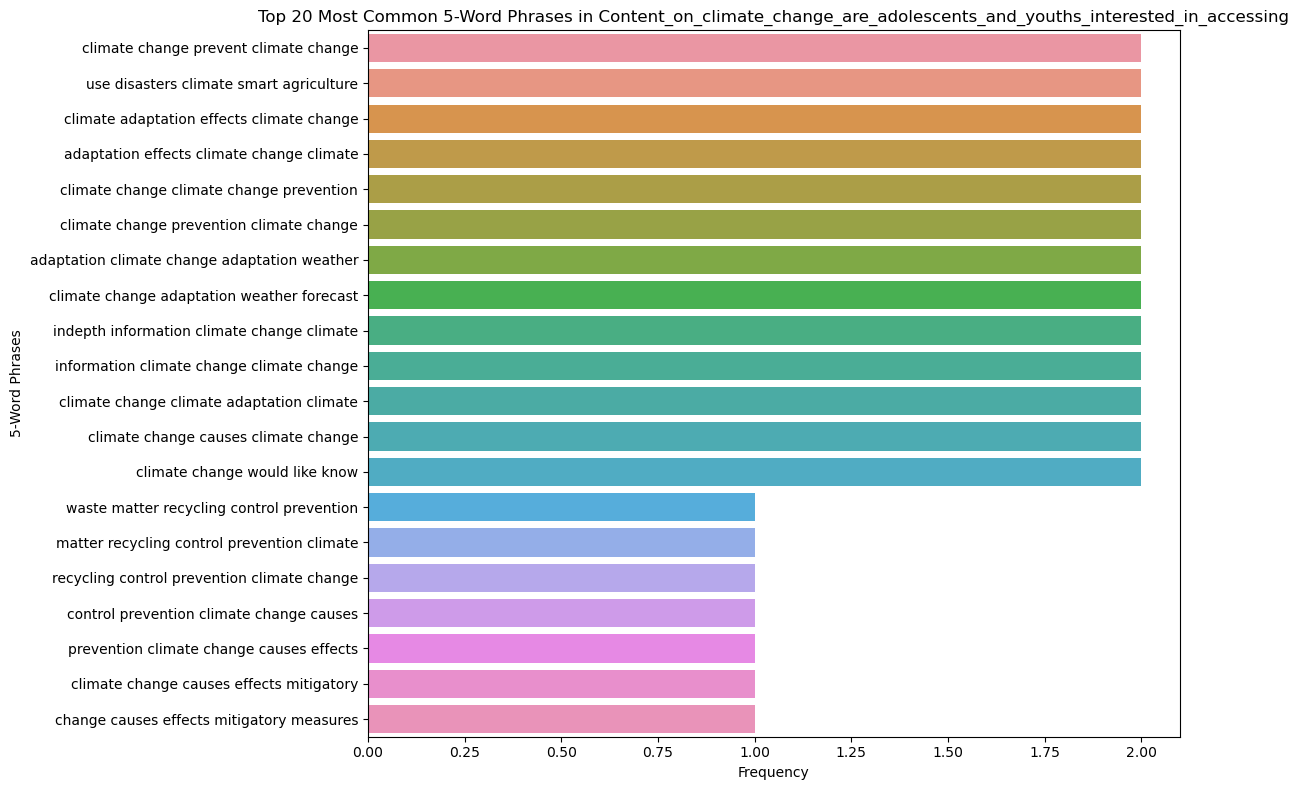


Top 5-Word Recommendation Phrases:
1. Climate change prevent climate change. (Occurrences: 2)
2. Use disasters climate smart agriculture. (Occurrences: 2)
3. Climate adaptation effects climate change. (Occurrences: 2)
4. Adaptation effects climate change climate. (Occurrences: 2)
5. Climate change climate change prevention. (Occurrences: 2)
6. Climate change prevention climate change. (Occurrences: 2)
7. Adaptation climate change adaptation weather. (Occurrences: 2)
8. Climate change adaptation weather forecast. (Occurrences: 2)
9. Indepth information climate change climate. (Occurrences: 2)
10. Information climate change climate change. (Occurrences: 2)
11. Climate change climate adaptation climate. (Occurrences: 2)
12. Climate change causes climate change. (Occurrences: 2)
13. Climate change would like know. (Occurrences: 2)
14. Waste matter recycling control prevention. (Occurrences: 1)
15. Matter recycling control prevention climate. (Occurrences: 1)
16. Recycling control preventi

In [307]:
# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['Content_on_climate_change_are_adolescents_and_youths_interested_in_accessing'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in Content_on_climate_change_are_adolescents_and_youths_interested_in_accessing')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

11. In your view, what makes it difficult for adolescents and youths in your community to get climate information, knowledge and skills?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


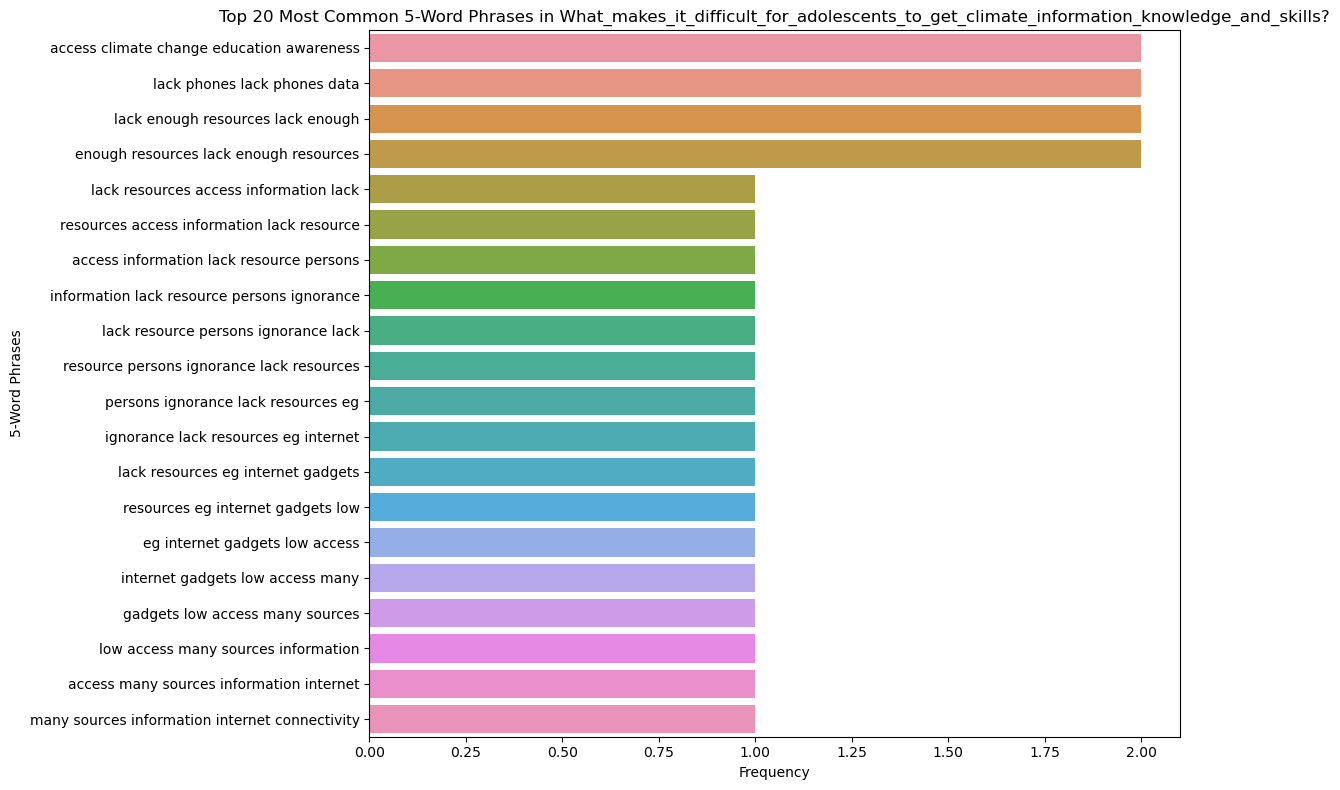


Top 5-Word Recommendation Phrases:
1. Access climate change education awareness. (Occurrences: 2)
2. Lack phones lack phones data. (Occurrences: 2)
3. Lack enough resources lack enough. (Occurrences: 2)
4. Enough resources lack enough resources. (Occurrences: 2)
5. Lack resources access information lack. (Occurrences: 1)
6. Resources access information lack resource. (Occurrences: 1)
7. Access information lack resource persons. (Occurrences: 1)
8. Information lack resource persons ignorance. (Occurrences: 1)
9. Lack resource persons ignorance lack. (Occurrences: 1)
10. Resource persons ignorance lack resources. (Occurrences: 1)
11. Persons ignorance lack resources eg. (Occurrences: 1)
12. Ignorance lack resources eg internet. (Occurrences: 1)
13. Lack resources eg internet gadgets. (Occurrences: 1)
14. Resources eg internet gadgets low. (Occurrences: 1)
15. Eg internet gadgets low access. (Occurrences: 1)
16. Internet gadgets low access many. (Occurrences: 1)
17. Gadgets low access ma

In [308]:
# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['What_makes_it_difficult_for_adolescents_to_get_climate_information_knowledge_and_skills?'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in What_makes_it_difficult_for_adolescents_to_get_climate_information_knowledge_and_skills?')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

12. In your view, what would make it easier for adolescents and youths in your community to get climate information, knowledge and skills?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


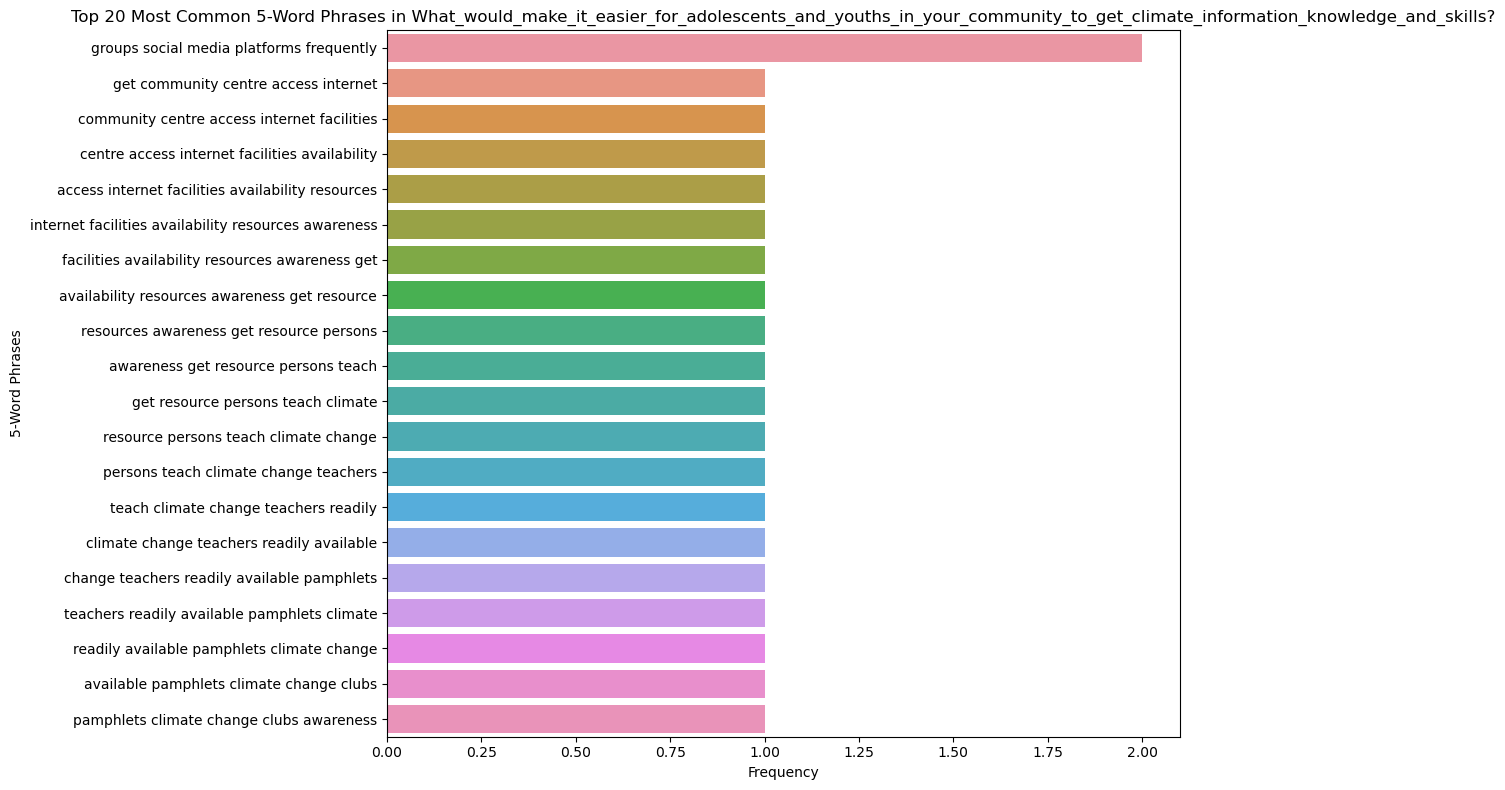


Top 5-Word Recommendation Phrases:
1. Groups social media platforms frequently. (Occurrences: 2)
2. Get community centre access internet. (Occurrences: 1)
3. Community centre access internet facilities. (Occurrences: 1)
4. Centre access internet facilities availability. (Occurrences: 1)
5. Access internet facilities availability resources. (Occurrences: 1)
6. Internet facilities availability resources awareness. (Occurrences: 1)
7. Facilities availability resources awareness get. (Occurrences: 1)
8. Availability resources awareness get resource. (Occurrences: 1)
9. Resources awareness get resource persons. (Occurrences: 1)
10. Awareness get resource persons teach. (Occurrences: 1)
11. Get resource persons teach climate. (Occurrences: 1)
12. Resource persons teach climate change. (Occurrences: 1)
13. Persons teach climate change teachers. (Occurrences: 1)
14. Teach climate change teachers readily. (Occurrences: 1)
15. Climate change teachers readily available. (Occurrences: 1)
16. Chan

In [309]:
# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['What_would_make_it_easier_for_adolescents_and_youths_in_your_community_to_get_climate_information_knowledge_and_skills?'].dropna().astype(str)).lower()

# Tokenize and clean text
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Function to get top n-grams
def get_top_ngrams(tokens, n, top_n=20):
    n_grams = ngrams(tokens, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

# Get top 5-word phrases (quin-grams)
quingrams = get_top_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot 5-word phrases
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for phrase, count in formatted_quingrams],
            y=[phrase for phrase, count in formatted_quingrams])
plt.title('Top 20 Most Common 5-Word Phrases in What_would_make_it_easier_for_adolescents_and_youths_in_your_community_to_get_climate_information_knowledge_and_skills?')
plt.xlabel('Frequency')
plt.ylabel('5-Word Phrases')
plt.tight_layout()
plt.show()

# Print the results in sentence form
print("\nTop 5-Word Recommendation Phrases:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Capitalize first letter and add period
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Occurrences: {count})")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


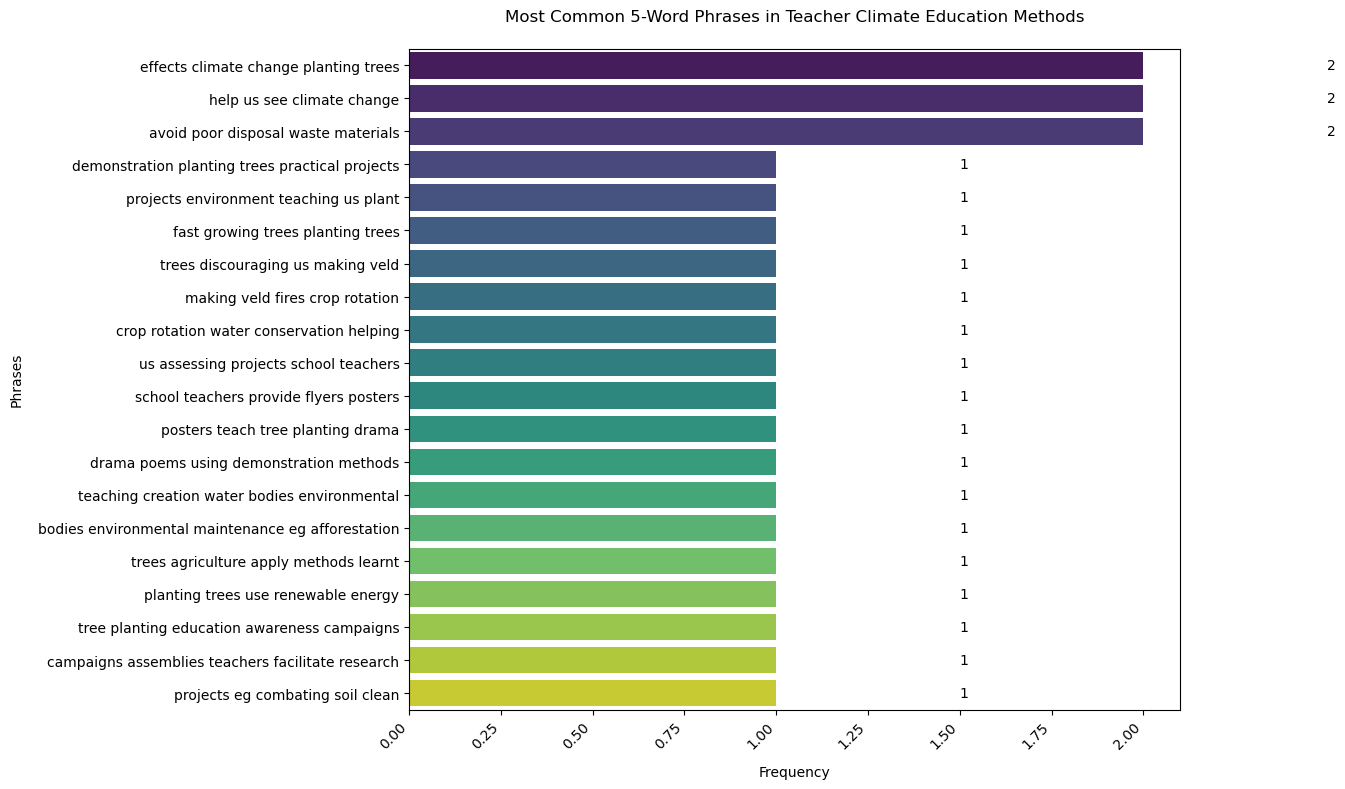


Key Phrases in Teacher Climate Education Methods:
1. Effects climate change planting trees. (Frequency: 2)
2. Help us see climate change. (Frequency: 2)
3. Avoid poor disposal waste materials. (Frequency: 2)
4. Demonstration planting trees practical projects. (Frequency: 1)
5. Projects environment teaching us plant. (Frequency: 1)
6. Fast growing trees planting trees. (Frequency: 1)
7. Trees discouraging us making veld. (Frequency: 1)
8. Making veld fires crop rotation. (Frequency: 1)
9. Crop rotation water conservation helping. (Frequency: 1)
10. Us assessing projects school teachers. (Frequency: 1)
11. School teachers provide flyers posters. (Frequency: 1)
12. Posters teach tree planting drama. (Frequency: 1)
13. Drama poems using demonstration methods. (Frequency: 1)
14. Teaching creation water bodies environmental. (Frequency: 1)
15. Bodies environmental maintenance eg afforestation. (Frequency: 1)
16. Trees agriculture apply methods learnt. (Frequency: 1)
17. Planting trees use r

In [310]:
# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['how-teachers/educators_are_helping_outside_of_the_classroom'].dropna().astype(str)).lower()

# Enhanced tokenization and cleaning
def clean_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    # Remove stopwords, punctuation, and single-character tokens
    cleaned = [word for word in tokens 
               if word.isalpha() 
               and word not in stop_words
               and len(word) > 1]
    return cleaned

filtered_tokens = clean_text(text_data)

# Function to get diverse n-grams (avoids repeating same root words)
def get_diverse_ngrams(tokens, n, top_n=20):
    n_grams = list(ngrams(tokens, n))
    freq_dist = Counter(n_grams)
    
    # Filter out n-grams that share too many common words
    unique_ngrams = []
    seen_words = set()
    
    for gram, count in freq_dist.most_common():
        # Check if this n-gram shares too many words with already selected ones
        overlapping_words = set(gram) & seen_words
        if len(overlapping_words) < n/2:  # Allow some overlap but not complete
            unique_ngrams.append((gram, count))
            seen_words.update(gram)
            if len(unique_ngrams) >= top_n:
                break
                
    return unique_ngrams

# Get top 5-word phrases with diversity
quingrams = get_diverse_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot with improved styling
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=[count for phrase, count in formatted_quingrams],
                y=[phrase for phrase, count in formatted_quingrams],
                palette="viridis")

plt.title('Most Common 5-Word Phrases in Teacher Climate Education Methods', pad=20)
plt.xlabel('Frequency', labelpad=10)
plt.ylabel('Phrases', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels
for i, (phrase, count) in enumerate(formatted_quingrams):
    ax.text(count + 0.5, i, str(count), va='center')

plt.show()

# Print the results with better formatting
print("\nKey Phrases in Teacher Climate Education Methods:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Proper sentence formatting
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Frequency: {count})")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


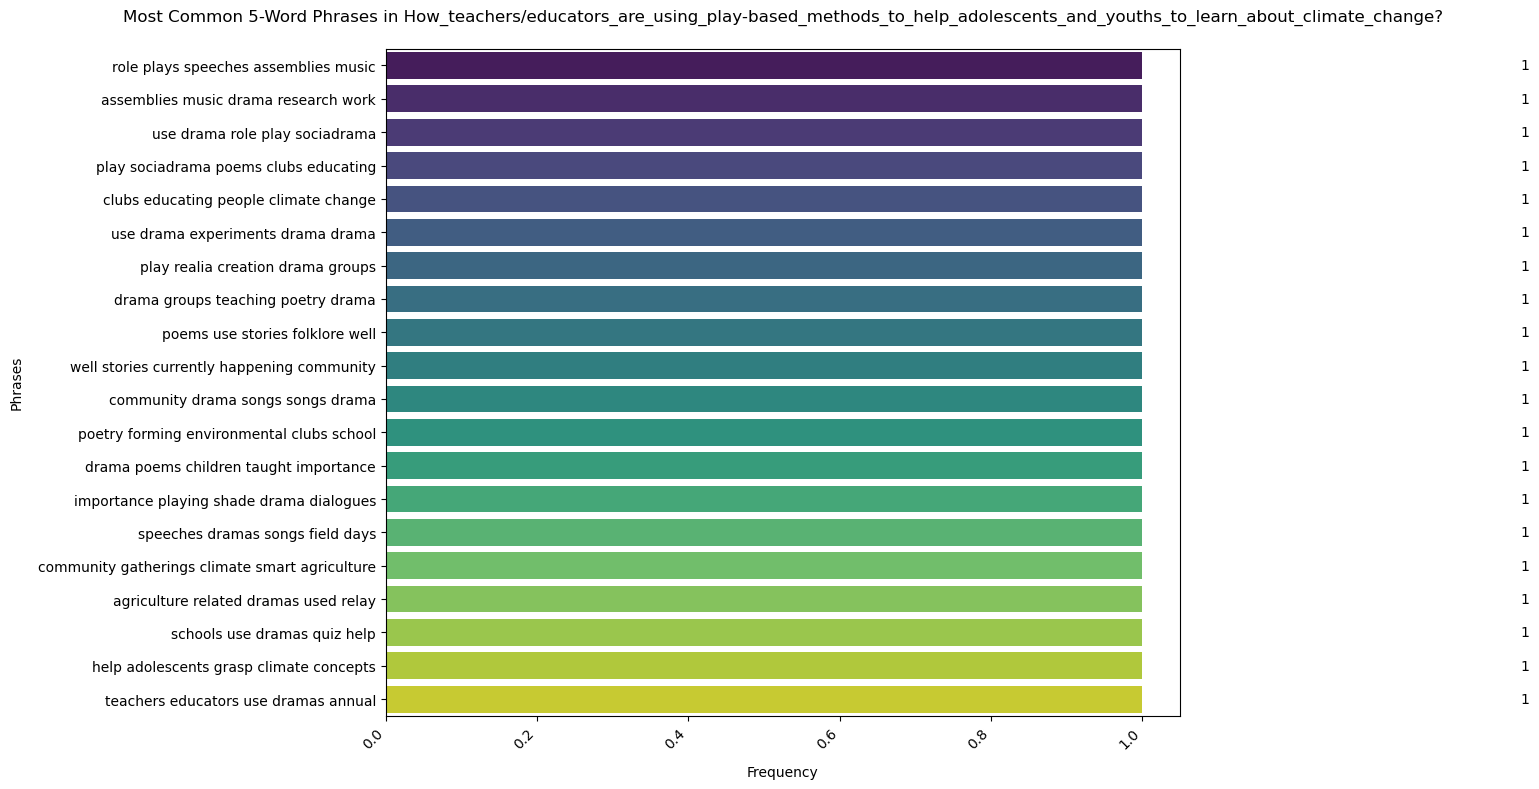


Key Phrases in Teacher Climate Education Methods:
1. Role plays speeches assemblies music. (Frequency: 1)
2. Assemblies music drama research work. (Frequency: 1)
3. Use drama role play sociadrama. (Frequency: 1)
4. Play sociadrama poems clubs educating. (Frequency: 1)
5. Clubs educating people climate change. (Frequency: 1)
6. Use drama experiments drama drama. (Frequency: 1)
7. Play realia creation drama groups. (Frequency: 1)
8. Drama groups teaching poetry drama. (Frequency: 1)
9. Poems use stories folklore well. (Frequency: 1)
10. Well stories currently happening community. (Frequency: 1)
11. Community drama songs songs drama. (Frequency: 1)
12. Poetry forming environmental clubs school. (Frequency: 1)
13. Drama poems children taught importance. (Frequency: 1)
14. Importance playing shade drama dialogues. (Frequency: 1)
15. Speeches dramas songs field days. (Frequency: 1)
16. Community gatherings climate smart agriculture. (Frequency: 1)
17. Agriculture related dramas used relay. 

In [312]:
# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['How_teachers/educators_are_using_play-based_methods_to_help_adolescents_and_youths_to_learn_about_climate_change?'].dropna().astype(str)).lower()

# Enhanced tokenization and cleaning
def clean_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    # Remove stopwords, punctuation, and single-character tokens
    cleaned = [word for word in tokens 
               if word.isalpha() 
               and word not in stop_words
               and len(word) > 1]
    return cleaned

filtered_tokens = clean_text(text_data)

# Function to get diverse n-grams (avoids repeating same root words)
def get_diverse_ngrams(tokens, n, top_n=20):
    n_grams = list(ngrams(tokens, n))
    freq_dist = Counter(n_grams)
    
    # Filter out n-grams that share too many common words
    unique_ngrams = []
    seen_words = set()
    
    for gram, count in freq_dist.most_common():
        # Check if this n-gram shares too many words with already selected ones
        overlapping_words = set(gram) & seen_words
        if len(overlapping_words) < n/2:  # Allow some overlap but not complete
            unique_ngrams.append((gram, count))
            seen_words.update(gram)
            if len(unique_ngrams) >= top_n:
                break
                
    return unique_ngrams

# Get top 5-word phrases with diversity
quingrams = get_diverse_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot with improved styling
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=[count for phrase, count in formatted_quingrams],
                y=[phrase for phrase, count in formatted_quingrams],
                palette="viridis")

plt.title('Most Common 5-Word Phrases in How_teachers/educators_are_using_play-based_methods_to_help_adolescents_and_youths_to_learn_about_climate_change?', pad=20)
plt.xlabel('Frequency', labelpad=10)
plt.ylabel('Phrases', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels
for i, (phrase, count) in enumerate(formatted_quingrams):
    ax.text(count + 0.5, i, str(count), va='center')

plt.show()

# Print the results with better formatting
print("\nKey Phrases in Teacher Climate Education Methods:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Proper sentence formatting
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Frequency: {count})")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


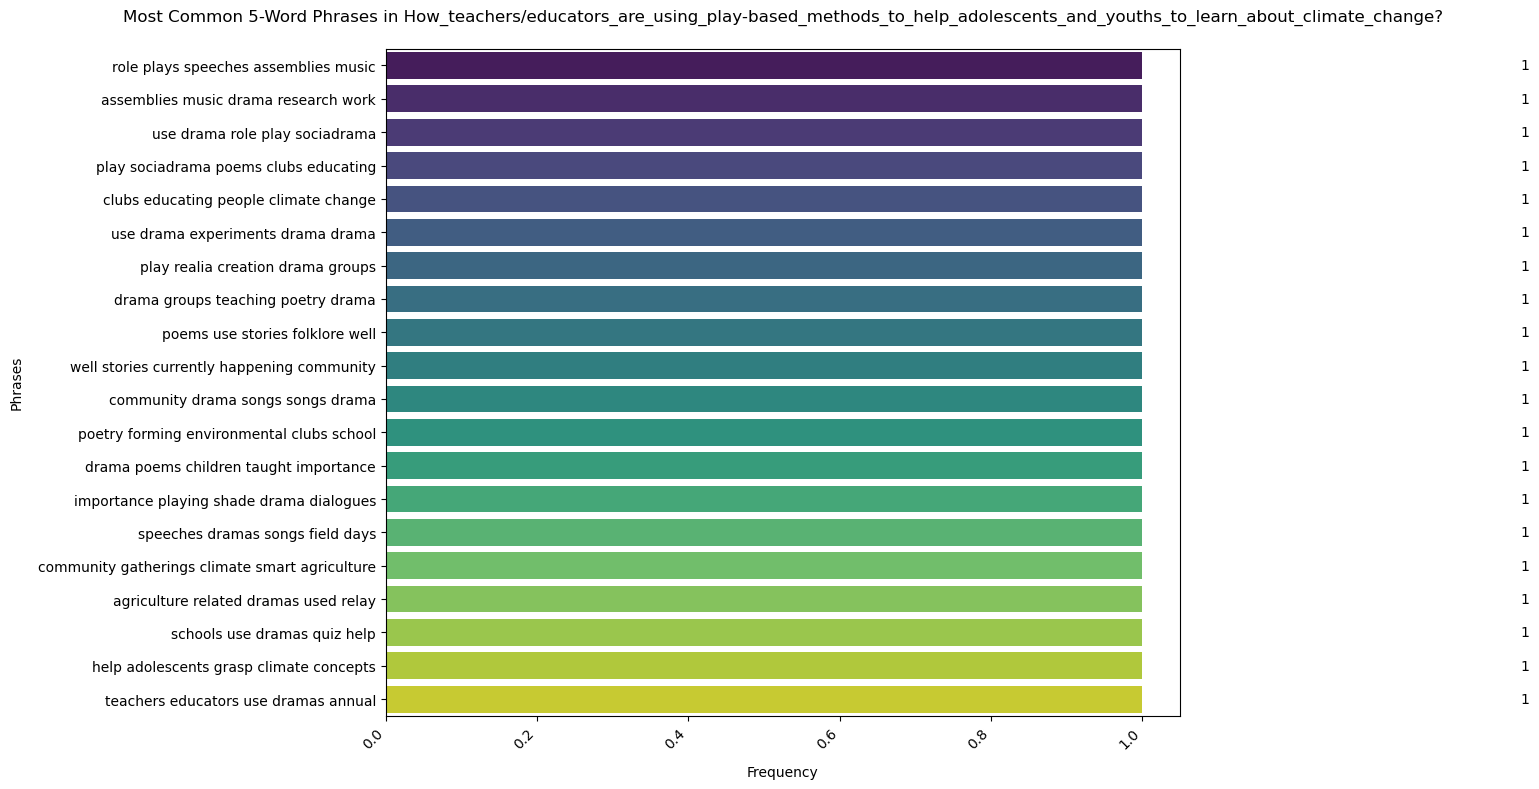


Key Phrases in Teacher Climate Education Methods:
1. Role plays speeches assemblies music. (Frequency: 1)
2. Assemblies music drama research work. (Frequency: 1)
3. Use drama role play sociadrama. (Frequency: 1)
4. Play sociadrama poems clubs educating. (Frequency: 1)
5. Clubs educating people climate change. (Frequency: 1)
6. Use drama experiments drama drama. (Frequency: 1)
7. Play realia creation drama groups. (Frequency: 1)
8. Drama groups teaching poetry drama. (Frequency: 1)
9. Poems use stories folklore well. (Frequency: 1)
10. Well stories currently happening community. (Frequency: 1)
11. Community drama songs songs drama. (Frequency: 1)
12. Poetry forming environmental clubs school. (Frequency: 1)
13. Drama poems children taught importance. (Frequency: 1)
14. Importance playing shade drama dialogues. (Frequency: 1)
15. Speeches dramas songs field days. (Frequency: 1)
16. Community gatherings climate smart agriculture. (Frequency: 1)
17. Agriculture related dramas used relay. 

In [313]:
# Assuming your dataframe is 'climate' with the recommendations column
text_data = ' '.join(climate['How_teachers/educators_are_using_play-based_methods_to_help_adolescents_and_youths_to_learn_about_climate_change?'].dropna().astype(str)).lower()

# Enhanced tokenization and cleaning
def clean_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    # Remove stopwords, punctuation, and single-character tokens
    cleaned = [word for word in tokens 
               if word.isalpha() 
               and word not in stop_words
               and len(word) > 1]
    return cleaned

filtered_tokens = clean_text(text_data)

# Function to get diverse n-grams (avoids repeating same root words)
def get_diverse_ngrams(tokens, n, top_n=20):
    n_grams = list(ngrams(tokens, n))
    freq_dist = Counter(n_grams)
    
    # Filter out n-grams that share too many common words
    unique_ngrams = []
    seen_words = set()
    
    for gram, count in freq_dist.most_common():
        # Check if this n-gram shares too many words with already selected ones
        overlapping_words = set(gram) & seen_words
        if len(overlapping_words) < n/2:  # Allow some overlap but not complete
            unique_ngrams.append((gram, count))
            seen_words.update(gram)
            if len(unique_ngrams) >= top_n:
                break
                
    return unique_ngrams

# Get top 5-word phrases with diversity
quingrams = get_diverse_ngrams(filtered_tokens, 5)

# Convert n-grams to readable strings
def format_ngrams(ngram_list):
    return [(' '.join(gram), count) for gram, count in ngram_list]

# Prepare data for visualization
formatted_quingrams = format_ngrams(quingrams)

# Plot with improved styling
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=[count for phrase, count in formatted_quingrams],
                y=[phrase for phrase, count in formatted_quingrams],
                palette="viridis")

plt.title('Most Common 5-Word Phrases in How_teachers/educators_are_using_play-based_methods_to_help_adolescents_and_youths_to_learn_about_climate_change?', pad=20)
plt.xlabel('Frequency', labelpad=10)
plt.ylabel('Phrases', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels
for i, (phrase, count) in enumerate(formatted_quingrams):
    ax.text(count + 0.5, i, str(count), va='center')

plt.show()

# Print the results with better formatting
print("\nKey Phrases in Teacher Climate Education Methods:")
for i, (phrase, count) in enumerate(formatted_quingrams, 1):
    # Proper sentence formatting
    sentence = phrase.capitalize() + '.'
    print(f"{i}. {sentence} (Frequency: {count})")